# Gamma factor calculation script algorithm
## Authors: Marcela Hernández and Esteban Soto
### CICIMA UCR

#### The gamma factor is the ratio between the maximum reflectance peak in the visible/UV range and the maximum reflectance peak in the IR range

conda install pandas, matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import re
#This line of code allow us to access data in colab


In [2]:
#open(r"/content/drive/My Drive/CICIMA/escarabajos_files/L1050_data", "r")

In [3]:
#is_this_colaboratory
working_in_colaboratory = False
working_at_cicima = True
wfh = False
#Training data is used when we are already certain of species and genera
training_data_is_used = False

if working_in_colaboratory:
  from google.colab import drive
  drive.mount("/content/drive")
  #base folder
  base_folder = r"/content/drive/My Drive/CICIMA/escarabajos_files/L1050_data/"
  #Report location
  #report_location = base_folder + r"report/gamma calculations"


  #Lists all archives in folder
  angsol_collection_path = base_folder + "ANGSOL//average" #listo
  angsol_collection_metadata = base_folder +  r"databases/CICIMA-beetles-general-inventory - ANGSOL.txt"

  #Lists all archives in folder
  cicimaucr_collection_path =  base_folder + "CICIMA-2024-01-REFLECTANCE//average" #listo
  cicimaucr_collection_2_path = base_folder + "CICIMA-2024-03-REFLECTANCE//average" #listo
  cicimaucr_collection_3_path = base_folder + "TRA_data_CICIMA_INBUCR//CICIMAUCR//reflectance" #listo
  cicima_ucr_metadata = base_folder + r"databases/CICIMA-beetles-general-inventory - CICIMAUCR.txt"

  #Lists all archives in folder
  inbucr_collection_path = base_folder + "INBUCR//average" #listo
  inbucr_metadata = base_folder + r"databases/CICIMA-beetles-general-inventory - INBUCR.txt"

  #Lists all archives in folder
  bioucr_collection_path = base_folder + "BIOUCR//average" #listo
  bioucr_metadata = base_folder + r"databases/CICIMA-beetles-general-inventory - BIOUCR.txt"

  agregated_data_avg_path = base_folder + "agregated_data" + "/peak_averages_krc.txt" #listo
  agregated_data_std_dev_path  =  base_folder + "agregated_data" + "/peak_std_krc.txt" #listo

elif wfh:
  #Report location
  #report_location = r"E:\CICIMA\Estudio Optico Escarabajos\gamma calculations"
  database_descriptor = "CICIMAUCR and ANGSOL"

  #Lists all archives in folder
  angsol_collection_path = r"E:\CICIMA\VINICIO\VINICIO\2024-03_ANGSOL-REFLECTANCE\SERIES1\ASC\average"

  angsol_collection_metadata =  r"E:\CICIMA\databases\CICIMA-beetles-general-inventory - ANGSOL.txt"

  #Lists all archives in folder
  cicimaucr_collection_path = r"E:\CICIMA\Estudio Optico Escarabajos\data_analysis\TRA_2024-03-15\optical_info\TRA_data\CICIMAUCR\reflectance" #listo
  cicimaucr_collection_2_path = r"E:\CICIMA\VINICIO\VINICIO\2024-01_CICIMAUCR-REFLECTANCE\SERIES1\ASC\average"
  cicimaucr_collection_3_path = r"E:\CICIMA\VINICIO\VINICIO\2023-03-CICIMAUCR-2-REFLECTANCE\average"
  cicima_ucr_metadata = r"E:\CICIMA\databases\CICIMA-beetles-general-inventory - CICIMAUCR.txt"

  #Lists all archives in folder
  inbucr_collection_path = r"2024-Q1-INBUCR-REFLECTANCE\2024-Q1-INBUCR-REFLECTANCE\ASC\average" #listo
  inbucr_metadata = r"E:\CICIMA\databases\CICIMA-beetles-general-inventory - INBUCR.txt"

  #Lists all archives in folder
  bioucr_collection_path = r"E:\CICIMA\2024Q1-BIOUCR-REFLECTANCE\2024Q1-BIOUCR-REFLECTANCE\ASC\average" #listo
  bioucr_metadata = r"E:\CICIMA\databases\CICIMA-beetles-general-inventory - BIOUCR.txt"
elif working_at_cicima:
    
  #Main locations
  base_folder = r"C:\Users\EstebanSoto\Jupyter\escarabajos"
  collection_tables_main_path = r"C:\Users\EstebanSoto\Jupyter\escarabajos\L1050_data\databases"
  collection_files_main_path = r"C:\Users\EstebanSoto\Jupyter\escarabajos\L1050_data"

  report_location = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis"
  database_descriptor = r"CICIMAUCR and ANGSOL"

  #Lists all archives in folder
  angsol_collection_path = os.path.join(collection_files_main_path,r"ANGSOL\average") 
  angsol_collection_metadata = os.path.join(collection_tables_main_path,"CICIMA-beetles-general-inventory - ANGSOL.txt") 

  #Lists all archives in folder
  cicimaucr_collection_path = os.path.join(collection_files_main_path,r"TRA_data_CICIMA_INBUCR\CICIMAUCR\reflectance")  #listo
  cicimaucr_collection_2_path = os.path.join(collection_files_main_path,r"CICIMA-2024-01-REFLECTANCE\average")
  cicimaucr_collection_3_path = os.path.join(collection_files_main_path,r"CICIMA-2024-03-REFLECTANCE\without iris nor lens\average")
  cicima_ucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - CICIMAUCR.txt") 

  #Lists all archives in folder
  inbucr_collection_path = os.path.join(collection_files_main_path,r"INBUCR\average") #listo
  inbucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - INBUCR.txt") 

  #Lists all archives in folder
  bioucr_collection_path = os.path.join(collection_files_main_path,r"BIOUCR\average")  #listo
  bioucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - BIOUCR.txt") 
  
  #agregated data location
  agregated_data_location = os.path.join(base_folder, "agregated_data")
  agregated_data_avg_path = os.path.join(agregated_data_location,"peak_averages_krc.txt" )  #listo
  agregated_data_std_path  = os.path.join( agregated_data_location , r"peak_std_krc.txt") #listo
  #peaklist_agregated_data_avg_path = r"C:\Users\EstebanSoto\Jupyter\escarabajos\agregated_data\peak_averages_krc.txt"
  #peaklist_agregated_data_std_dev_path =r"C:\Users\EstebanSoto\Jupyter\escarabajos\agregated_data\peak_std_krc.txt"
    
#variables
prominence_threshold_min = 0.15
prominence_threshold_max = 0.60
min_height_threshold_denominator = 3.0
max_height_threshold_denominator = 2.5
min_distance_between_peaks = 125 #nm

#amount of specimens that would overlap with other species region
percentile_differentiation_amount = 0.25


In [4]:
#Define Specimen Collaction class
class Specimen_Collection:
    def read_collection(self,database_path):
        with open(database_path, encoding= "latin1") as f:
          df = pd.read_csv(f, sep="\t", decimal =",", header=0, encoding="iso-8859-1")
          return df

    def __init__(self, name, data_folder_path, metadata_path, quality):
        self.name = name
        self.data_folder_path = data_folder_path
        self.metadata = self.read_collection(metadata_path)
        self.quality = quality
        self.description = "No description"

    def set_description(self, description):
        self.description = description


In [5]:
#Collections
angsol_collection = Specimen_Collection("ANGSOL", angsol_collection_path, angsol_collection_metadata, "HIGH")
angsol_collection.set_description("ANGSOL collection has specimens that belong to Angel Solís. The confidence that we have about specimen identification is high.")

cicimaucr_collection = Specimen_Collection("CICIMAUCR1", cicimaucr_collection_path, cicima_ucr_metadata, "HIGH")
cicimaucr_collection_2 = Specimen_Collection("CICIMAUCR2", cicimaucr_collection_2_path, cicima_ucr_metadata, "HIGH")
cicimaucr_collection_3 = Specimen_Collection("CICIMAUCR3", cicimaucr_collection_3_path, cicima_ucr_metadata, "HIGH")
inbucr_collection = Specimen_Collection("INBUCR", inbucr_collection_path, inbucr_metadata, "MID")
bioucr_collection = Specimen_Collection("BIOUCR", bioucr_collection_path, bioucr_metadata, "LOW")

collection_list = [
                    #angsol_collection,
                    #cicimaucr_collection,
                    #cicimaucr_collection_2,
                    cicimaucr_collection_3,
                    #inbucr_collection,
                    #bioucr_collection,
                    ]
collection_names_set = set([collection.name for collection in collection_list])
collection_names = " ".join( sorted(collection_names_set))
print(collection_names)
#date
from datetime import datetime
current_date = datetime.now().date()

CICIMAUCR3


### Functions

In [6]:
def create_path_if_not_exists(path):
        # Check if the path already exists
        if not os.path.exists(path):
            # Create the directory and any missing parent directories
            os.makedirs(path)
            print(f"Directory '{path}' created successfully.")
        else:
            print(f"Directory '{path}' already exists.")

In [7]:
### Third test: Plots on demand
#!pip install reportlab
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.enums import TA_CENTER
import matplotlib.pyplot as plt
import numpy as np



#styles
def styles():
    # Title
    title_style = getSampleStyleSheet()["Title"]

    # Heading1 - Heading6
    heading1_style = getSampleStyleSheet()["Heading1"]
    heading2_style = getSampleStyleSheet()["Heading2"]
    # You can similarly access Heading3, Heading4, Heading5, Heading6

    # Normal
    normal_style = getSampleStyleSheet()["Normal"]

    # Bullet
    bullet_style = getSampleStyleSheet()["Bullet"]

    # BodyText
    body_style = getSampleStyleSheet()["BodyText"]

    # Italic / Bold / Underline
    italic_style = getSampleStyleSheet()["Italic"]
    bold_style = getSampleStyleSheet()["Bold"]
    underline_style = getSampleStyleSheet()["Underline"]

    # Code
    code_style = getSampleStyleSheet()["Code"]

sections = {}

def create_paragraph(text):
    title_style = getSampleStyleSheet()["Title"]
    centered_title_style = ParagraphStyle(
    name='CenteredTitle',
    parent=title_style,
    fontSize=14,
    alignment=1  # 0 for left, 1 for center, 2 for right
    )
    institution = Paragraph(text, centered_title_style)
    return institution

# Create title page
def create_title_page():
    elements = []

    # Title
    title_style = getSampleStyleSheet()["Title"]
    title = Paragraph("Gamma algorithms report", title_style)
    elements.append(title)
    elements.append(Spacer(1, 24))

    # Author
    #author_style = getSampleStyleSheet()["Normal"]
    centered_title_style = ParagraphStyle(
    name='CenteredTitle',
    parent=title_style,
    fontSize=14,
    alignment=1  # 0 for left, 1 for center, 2 for right
    )
    #heading1_style = getSampleStyleSheet()["Heading3"]
    author = Paragraph("Dra. Marcela Hernández & Esteban Soto.", centered_title_style)
    elements.append(author)
    elements.append(Spacer(1, 6))
    institution = Paragraph("Centro de Investigación en Ciencia e Ingeniería de los Materiales", centered_title_style)
    elements.append(institution)
    elements.append(create_paragraph("2024"))
    elements.append(create_paragraph("University of Costa Rica"))
    elements.append(create_paragraph(f"{current_date}"))
    elements.append(PageBreak())


    return elements

# Create table of contents
def create_table_of_contents(toc_data):
    toc_style = getSampleStyleSheet()["Heading1"]
    toc = [Paragraph("Table of Contents", toc_style), Spacer(1, 12)]
    #toc_data = []
    for section, page_num in sections.items():
        toc_data.append([Paragraph(section, toc_style), str(page_num)])
    toc_table = Table(toc_data)
    toc_table.setStyle(TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                                   ('TEXTCOLOR', (0, 0), (-1, 0), colors.blue),
                                   ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                                   ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                                   ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey)]))
    toc.append(toc_table)
    toc.append(PageBreak())
    return toc


# Create sections with headings, paragraphs, and figures
def gamma_analysis(gamma_testbench):
    
    #variable definition
    gamma = gamma_testbench.gamma_class
    test_df = gamma_testbench.test_df
    species_list = test_df['species'].unique().tolist()
    boxplot_path = gamma_testbench.boxplot_path
    boxplot_analysis = ""
    conclusion_text = ""
    
    print(f"{species_list = }")
    #sections
    sections = {}

    # Section 1: algorithm_descrioption
    algorithm_description = [Paragraph(f"Algorithm description: {gamma.name()}", getSampleStyleSheet()["Heading2"]), Spacer(1, 12),
                    Paragraph(f"{gamma.description()}", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 24)]


    # Section 2: Results
    results = [Paragraph("Results", getSampleStyleSheet()["Heading2"]), Spacer(1, 12),
               Paragraph("", getSampleStyleSheet()["Normal"]),
               Spacer(1, 24)]
    
    # Section 3: Species differentiation
    
    percentile = percentile_differentiation_amount
    
    def species_quartiles(test_df):
            
        test_average = test_df["gamma"].mean()
        test_std = test_df["gamma"].std()
        
        first_percentile = test_df["gamma"].quantile(percentile)
        third_percentile = test_df["gamma"].quantile(1 - percentile)
        
        return test_average, test_std, first_percentile, third_percentile
    
    quartile_info = pd.DataFrame([])
    
    #calculate quartile info for each species
    for species in species_list:
        #filter df
        filtered_df = test_df[test_df["species"] == species]
        #get only that species data
        quartile_info.loc[species, "average"],quartile_info.loc[species, "std"],quartile_info.loc[species, "Q1"],quartile_info.loc[species, "Q3"] = species_quartiles(filtered_df)
    
    def species_differentiation(species_list):
        print(f"{quartile_info}")
        #at the beginning every species could be differentiable
        differentiable_species = [element for element in species_list]
        
        for species in species_list:
            #But, if is a species quartiles falls inside other species quartile's range, it will be removed
            print(f"Current {differentiable_species=}")
            
            other_species_list = [element for element in species_list if element != species]
            
            q1_main = quartile_info.loc[species, "Q1"]
            q3_main = quartile_info.loc[species, "Q3"]
            
            for other_species in other_species_list:
                q1_other = quartile_info.loc[other_species, "Q1"]
                q3_other = quartile_info.loc[other_species, "Q3"]
                
                #if one of the ranges is between any other species range, that species will be rejected.
                print(f"{q1_main=} {q3_main=} {q1_other=} {q3_other=}")
                print(f"Test: {( (q1_other < q1_main) & (q3_other < q1_main)) | ( (q3_main < q1_other) & (q3_main < q3_other)) =}")
                if  not ( (q1_other < q1_main) & (q3_other < q1_main)) | ( (q3_main < q1_other) & (q3_main < q3_other)):
                    try:
                        differentiable_species.remove(species)
                    except Exception as e:
                        print(Exception)
                        print("Already deleted")
                    
            #finish iterating each species
        return differentiable_species
    
        
        #This section determines if species sections overlap, if they don't, that means that one species can be differentiated. 
    
    #Section 4. Add boxplot to report
    results.append(Paragraph(f"Gamma boxplot for {gamma.name()}", getSampleStyleSheet()["Heading3"]))
    results.append(Image(boxplot_path, width=400, height=400*0.9))
    results.append(Paragraph(boxplot_analysis, getSampleStyleSheet()["Normal"]))
    results.append(PageBreak())
    
    # Section 3: Differentiable species
    differentiable_species = species_differentiation(species_list)
    
    print(f" Final {differentiable_species=}")
    
    if differentiable_species:
        
        differentiable_species_paragraph = [Paragraph("Differentiable species:", getSampleStyleSheet()["Heading3"]), Spacer(1, 12),
                   Paragraph(f"Assuming each species is distributed normally: Differentiable species are: {differentiable_species}. {(1 -percentile) * 100}% of these specimens will be found in a region in which the probability of being a specimen of other species is less than {percentile * 100} %.", getSampleStyleSheet()["Normal"]),
                   Spacer(1, 24)]
        results += differentiable_species_paragraph
    else:
        print(f"{differentiable_species=}")
        differentiable_species_paragraph = [Paragraph("No differentiable species could be found:", getSampleStyleSheet()["Heading3"]), Spacer(1, 12),
                   Paragraph(f" Assuming each species is distributed normally: There is no region in which {(1-percentile) * 100}% of the specimens of any species would not overlap with other's species central {(1 - percentile)*100} percentile of individuals. ", getSampleStyleSheet()["Normal"]),
                   Spacer(1, 24)]
        results += differentiable_species_paragraph
    
    results.append(PageBreak())
    
   

    # results.append(Paragraph("Exponential Function Plot", getSampleStyleSheet()["Heading2"]))
    # results.append(Image("exponential_plot.png", width=400, height=300))
    # results.append(Spacer(1, 24))

    # Section 4: Conclusion
    conclusion = [Paragraph("Conclusion", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                  Paragraph(conclusion_text, getSampleStyleSheet()["Normal"]),
                  Spacer(1, 24)]

    sections[f"Algorithm Description: {gamma.name()}"] = len(algorithm_description)
    sections["Results"] = len(results)
    sections["Conclusion"] = len(conclusion) + sections["Results"]



    return algorithm_description  + results #+ conclusion, sections

# Create bibliography
def create_bibliography():
    bibliography = [Paragraph("References", getSampleStyleSheet()["Heading1"]), Spacer(1, 12),
                    Paragraph("1. Author A, et al. (Year). Title of the paper. Journal Name, Volume(Issue), Page Numbers.", getSampleStyleSheet()["Normal"]),
                    Paragraph("2. Author B, et al. (Year). Title of the paper. Journal Name, Volume(Issue), Page Numbers.", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 24)]
    return bibliography



In [8]:
def get_metadata_and_dataframe(file_location):
     #definitions
    #Logic to read ASCII data
    import os
    import pandas as pd
    import re

    def get_sample_code_from_filename(row_str, file_location):
        #print("string")
        #print(file_location)
        filename = os.path.basename(file_location)
        re1 = r"([a-zA-Z\d]+)(?:-\d)*(?:.Sample)*.(?:txt)*(?:ASC)*"
        #Names are in the form CODE-MEASUREMENTNUMBER.TXT
        p = re.compile(re1)
        m = p.match(filename)
        # print(f"match filename: {m}")
        if m:
            # print(f"group 1: {m.group(1)}")
            return(m.group(1))
        return get_sample_code(file_str)

    def get_sample_code(row_str):
        #Tries to get the sample code from the file, if it does not match
        #it tries to get it from the filename.
        # print("string")
        # print(row_str)
        re1 = r"([a-zA-Z\d]+)(?:-\d)*(?:.Sample)*.(?:txt)*(?:ASC)*"
        #Names are in the form CODE-MEASUREMENTNUMBER.TXT
        p = re.compile(re1)
        m = p.match(row_str)
        # print(f"match: {m}")
        if m:
            return(m.group(1))
        else:
            ""

    def responses(str):
        re1 = "\d+/(\d+,\d+) \d+,\d+/(\d+,\d+)"
        p = re.compile(re1)
        m= p.match(str)
        if m:
            return m.group(1),m.group(2)
        else:
            return "",""
    def attenuator_settings(str):
        re1 = "S:(\d+,\d+) R:(\d+,\d+)"
        p = re.compile(re1)
        m= p.match(str)
        if m:
            return m.group(1),m.group(2)
        else:
            return "",""
    def slit_pmt_aperture(str):
        re1 = "\d+/servo \d+,\d+/(\d+,\d+)"
        p = re.compile(re1)
        m= p.match(str)
        if m:
            return m.group(1)
        else:
            return ""
    #Initializa metadata dict
    metadata = {}

    #Read header
    lines = []
    with open(file_location, encoding= "latin1") as myfile:
        lines = myfile.readlines()[0:90]
    metadata["header"] = "".join(lines)


    #read_metadata
    f = open(file_location, encoding= "latin1")

    df = pd.DataFrame()
    with f as data_file:
        for index, row in enumerate(data_file): #0-89

            row_str = row.strip()
            if index +1 == 3: #Filename and extension
                metadata["filename"]= row_str
                metadata["code"] = get_sample_code_from_filename(row_str, file_location)
            if index + 1 == 4: #date DD/MM/YYYY
                metadata["date"]= row_str
            if index + 1 == 5:#Time HH:MM:SS.SS
                metadata["time"]= row_str
            if index + 1 == 8:#user
                metadata["user"]= row_str
            if index + 1 == 9:#description
                metadata["description"]= row_str
            if index + 1 == 10:#minimum wavelength
                metadata["minimum_wavelength"]= row_str
            if index + 1 == 12:#equipment name
                metadata["equipment"]= row_str
            if index + 1 == 13:#equipment series
                metadata["series"]= row_str
            if index + 1 == 14:#data visualizer version, equipment version, date and time
                metadata["software"]= row_str
            if index + 1 == 21:#Operating mode
                metadata["operating_mode"]= row_str
            if index + 1 == 22: #Number of cycles
                metadata["cycles"]= row_str
            if index + 1 == 32: #range/servo
                metadata["slit_pmt"]= slit_pmt_aperture(row_str)
            if index + 1 == 33:
                metadata["response_ingaas"], metadata["response_pmt"]= responses(row_str)
            if index + 1 == 35: #pmt gain, if 0 is automatic
                metadata["pmt_gain"]= row_str
            if index + 1 == 36: #InGaAs detector gain
                metadata["ingaas_gain"]= row_str
            if index + 1 == 42:#monochromator wavelength nm
                metadata["monochromator_change"]= row_str
            if index + 1 == 43:#lamp change wavelength
                metadata["lamp_change"]= row_str
            if index + 1 == 44:#pmt wavelength
                metadata["pmt_change"]= row_str
            if index + 1 == 45:#beam selector
                metadata["beam_selector"]= row_str
            if index + 1 == 46:
                metadata["cbm"]= row_str
            if index + 1 == 47: #cbd status, on/off
                metadata["cbd_status"]= row_str
            if index + 1 == 48: #attenuator percentage
                metadata["attenuator_sample"], metadata["attenuator_reference"]= attenuator_settings(row_str)
            if index + 1 == 49:
                metadata["polarizer"]= row_str
            if index + 1 == 80:
                metadata["units"]= row_str
            if index + 1 == 81:
                metadata["measuring_mode"]= row_str
            if index + 1 == 84:
                metadata["maximum_wavelength"]= row_str
            if index + 1 == 85:
                metadata["step"]= row_str
            if index + 1 == 86:
                metadata["number_of_datapoints"]= row_str
            if index + 1 == 88:
                metadata["maximum_measurement"]= row_str
            if index + 1 == 89:
                metadata["minimum_measurement"]= row_str
            if index +1 == 90:
                break
        df = pd.read_csv(f, sep="\t", decimal =".", names=["wavelength", metadata["measuring_mode"]]).dropna()
        df = df[df["wavelength"]<2000]
        df["wavelength"],df[metadata["measuring_mode"]] = df["wavelength"].astype(float), df[metadata["measuring_mode"]].astype(float)
        return metadata, df

In [9]:
#Spectrum class

class Spectrum:

    def __str__(self):
        return self.code

    def __init__(self, name, metadata, data, database):

        import re

        def get_genus(code, database):
            #print("get_genus")

            specimen=database.loc[database["code"]==code]

            if specimen.empty:
                print(f"No data for {code} in database {database}")
                return ""
            #print("not mt")
            # print(f"specimen genus {specimen}")
            result = specimen.iloc[0]["genus"]
            #print(f"genus, type{type(result)}")
            if isinstance(result,str):

                return result
            else:

                return str(result)

        def get_species(code, database):
            #print("get_species")
            # print(f"code: {code}")
            specimen=database.loc[database["code"]==code]

            if specimen.empty:
                print(f"No data for {code} in database {database}")
                result = ""
            #print("not mt")
            #print(f"specimen species {specimen}")
            result = str(specimen.iloc[0]["species"])
            #print(f"species, type{type(result)}")
            if isinstance(result,str):

                return result
            else:

                return str(result)

        #attributes
        self.name = name
        self.metadata = metadata
        self.code = metadata["code"]
        self.data = data
        self.database = database
        self.filename =  metadata["filename"]
        self.genus = get_genus(self.code, database)
        self.species = get_species(self.code, database)
        self.measuring_mode = self.metadata["measuring_mode"]

    def plot(self):
        measuring_mode = self.metadata["measuring_mode"]
        return self.data.plot(x="wavelength", y =self.metadata["measuring_mode"], grid=True, markersize=3, title=f"{measuring_mode} for {self.genus} {self.species}, code {self.code}")


    def get_normalized_spectrum(self):
        df = self.data[["wavelength", self.measuring_mode]]
        max_value = df[self.measuring_mode].max()
        df[self.measuring_mode] = df[self.measuring_mode]/max_value
        return df

def read_spectrum(file_path, database):

    metadata, df = get_metadata_and_dataframe(file_path)
    #print(metadata)
    #print(df)
    spectrum = Spectrum(metadata["filename"], metadata, df, database )
    #print(spectrum.data)
    return spectrum

def read_spectra_from_folder(folder_path, database_metadata):

    #list files in folder
    file_list = os.listdir(folder_path)

    #file extension
    file_extension = ".txt"

    # filters a list of strings to create a new list containing only the elements that end with file_extension

    def filter_substring_elements(path_strings, substring):
        filtered_paths = [path for path in path_strings if substring in path]
        return filtered_paths

    #full path list
    filtered_list = [os.path.join(folder_path, path) for path in filter_substring_elements(file_list, file_extension)]

    #read each element of filtered_list
    spectra = []

    for path in filtered_list:
        spectrum = read_spectrum(path, database_metadata)
        spectra.append(spectrum)

    return spectra




In [10]:
class Peak:
        def __init__(self, x, y):
            self.x_value = x
            self.y_value = y
        def __str__(self):
            return f"({self.x_value}, {self.y_value})"
        def __repr__(self):
            return f"({self.x_value}, {self.y_value})"

class PeakList:


    def __init__(self, spectrum):
        self.spectrum = spectrum
        self.peaks = self.get_peaks()

    def get_peaks(self):
        import scipy
        #get info
        x = self.spectrum.data["wavelength"].values
        y = self.spectrum.data[self.spectrum.metadata["measuring_mode"]].values
        # print(f"x {x}")
        # print(f"len {len(x)}")
        # print(f"y {y}")
        #parameters
        min_height = y.max()/max_height_threshold_denominator
        
        width_t = 50.00

        #get peaks
        #peaks_funct = scipy.signal.find_peaks(y)
        #peaks_funct = scipy.signal.find_peaks(y, height= min_height)
        #peaks_funct = scipy.signal.find_peaks(y, height= min_height, distance= min_distance)
        peaks_funct = scipy.signal.find_peaks(y, height= min_height, distance= min_distance_between_peaks, prominence=prominence_threshold_max)
        #peaks_index = scipy.signal.find_peaks(y, distance =[min_distance,max_distance])[0]
        #peaks_index = scipy.signal.find_peaks(y, distance =min_distance, width = width_t)[0]
        # print(f"peaks_funct {peaks_funct}")
        peaks_index = peaks_funct[0]
        # print(f"peaks_index {peaks_index}")
        x_values = x[peaks_index]
        y_values = y[peaks_index]
        #print(f"x_values {x_values}")
        #print(f"y_values {y_values}")
        peaks = []
        for i in range(len(x_values)):
            peak = Peak(x_values[i], y_values[i])
            peaks.append(peak)
        return peaks

    def plot(self):
        self.spectrum.plot()
        x_values = []
        y_values = []
        for peak in self.get_peaks():
            x_values.append(peak.x_value)
            y_values.append(peak.y_value)
        return plt.scatter(x_values, y_values, color="r")

In [11]:
def get_test_spectra(collection_list):
    #read spectra in location_list
    filtered_spectra = []

    for index, collection in enumerate(collection_list):
        #print(f"location:{location}")

        spectra = read_spectra_from_folder(collection.data_folder_path, collection.metadata)

        #filter spectra if needed

        filtered_spectra.extend(spectra)
        # Filter spectra to those that have species data
        filtered_spectra = [spectrum for spectrum in filtered_spectra if spectrum.species != "nan"]
        return filtered_spectra


#### Maxima and Minima methods

In [12]:
def get_minima(spectrum):
    #Get minimum
    #def get_minimum(
    import scipy

    #get wavelength and height of measurements
    x = spectrum.data["wavelength"].values
    y = spectrum.data[spectrum.metadata["measuring_mode"]].values
    #reflect plot across x axis and displace it upwards
    y_max = y.max()
    y_inverted = -y + y_max
    min_distance = 50 #min distance between two minima

    #get minima
    #peaks_funct = scipy.signal.find_peaks(y_inverted, height= min_height, distance= min_distance, prominence=0.15)
    peaks_funct = scipy.signal.find_peaks(y_inverted, distance= min_distance, prominence=prominence_threshold_min)
    peaks_index = peaks_funct[0]
    x_values = x[peaks_index]
    y_values = y[peaks_index]
    
    # print("plot minima")
    # plt.plot(x, y)
    # plt.grid(True)
    # plt.scatter(x_values, y_values)
    # plt.show()
    return peaks_index, x_values, y_values

In [13]:
def get_maxima(spectrum):
    import scipy
    #get wavelength and height of measurements
    x = spectrum.data["wavelength"].values
    y = spectrum.data[spectrum.metadata["measuring_mode"]].values

    #define minimum height and min distance between minima
    min_height = y.max()/min_height_threshold_denominator
    min_distance = 50 #nm
    max_distance = 100.00
    width_t = 50.00

    #get maxima
    peaks_funct = scipy.signal.find_peaks(y, height= min_height, distance= min_distance, prominence= prominence_threshold_max)
    peaks_index = peaks_funct[0] #indices
    x_values = x[peaks_index]   #x values
    y_values = y[peaks_index]    #y values

    #plot
    # print("plot maxima")
    # plt.plot(x, y)
    # plt.grid(True)
    # plt.scatter(x_values, y_values)
    # plt.show()
    return peaks_index, x_values, y_values

#### Filter Spectra
In this section we filter out any specimen row which is different  from kalinini, cupromarginata or resplendens species

In [14]:
def get_filtered_spectra(collection_list):

    #read spectra in location_list
    filtered_spectra = []

    for index, collection in enumerate(collection_list):
        #print(f"location:{location}")

        spectra = read_spectra_from_folder(collection.data_folder_path, collection.metadata)

        #filter spectra if needed

        filtered_spectra.extend(spectra)

    # Filter spectra to those that have species data
    filtered_spectra = [spectrum for spectrum in filtered_spectra if spectrum.species != "nan"]

    #filter to only those entries that are either  resplendens, kalinini or cupreomarginata
    filtered_spectra = [spectrum for spectrum in filtered_spectra if ((spectrum.species == "resplendens") | (spectrum.species == "kalinini") | (spectrum.species == "cupreomarginata"))]
    #print(filtered_spectra)

    #calculate metadata

    #How many specimens of each species are there
    species_list = [spectrum.species for spectrum in filtered_spectra]
    species_list_set = set(species_list)
    species_counter = {}

    for current_species in species_list_set:
        species_i_list = [species for species in species_list if species == current_species]
        species_counter[current_species] = len(species_i_list)


    return filtered_spectra, species_counter




#### Specimen Section

In [15]:
# Create sections with headings, paragraphs, and figures
def get_specimen_section( filtered_spectra, species_counter ):


    def dict_to_matrix(data):
        # Extract keys and values from the dictionary
        keys = list(data.keys())
        values = list(data.values())

        # Create a list of rows
        rows = [keys] + [values]

        return rows

    #Define sections and results
    sections = {}
    results =[]
    information = []
    
    # Section 1: Executive Summary
    specimen_information = []
    exec_sum = [Paragraph(f"Executive Summary:", getSampleStyleSheet()["Heading2"]), Spacer(1, 12),
                    Paragraph(f"""This report analyzes different algorithms focused on differentiating among Chrysina kalinini, C. resplendens and C. cupreomarginata species. These algorithms will analyze a particular spectrum and will produce a number. That index is going to be averaged and a boxplot will be made for each species.
                    This information can be used in the future to analyze unknown spectra and make a guess of the most probable identity for a sample.
                    """, getSampleStyleSheet()["Normal"]),
                    Spacer(1, 24)]
    specimen_information += exec_sum
    # Section 1: Introduction
    
    title = [Paragraph(f"Specimen Information:", getSampleStyleSheet()["Heading2"]), Spacer(1, 12),
                    Paragraph(f"The following collections were used: {collection_names} ", getSampleStyleSheet()["Normal"]),
                    Paragraph("Number of specimens per species:", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 24)]
    specimen_information += title

    #Create table of species:
    #list of species
    species_table = dict_to_matrix(species_counter)
    #create table
    table = Table(species_table)
    style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.white),
                        ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
                        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
                        ('GRID', (0, 0), (-1, -1), 1, colors.black)])

    table.setStyle(style)
    information.append(table)
    #information.append(PageBreak())

    #Add table with species info

    sub_title = [Paragraph(f"Relevant data:", getSampleStyleSheet()["Heading3"]), Spacer(1, 12)]

    information += sub_title

    #create table with specimen info
    df_specimen_info = pd.DataFrame([], columns = ["code", "genus", "species", "measuring_mode"])
    for index, spectrum in enumerate(filtered_spectra):
        df_specimen_info.loc[ index, "code"] = spectrum.code
        df_specimen_info.loc[ index, "genus"] =spectrum.genus
        df_specimen_info.loc[ index,"species"] =spectrum.species
        df_specimen_info.loc[ index, "measuring_mode"] = spectrum.metadata["measuring_mode"]

    names =[ ["code", "genus", "species", "measuring_mode"]]
    #df_specimen_info.values
    #list of species

    specimen_info = names + df_specimen_info.values.tolist()
    #create table
    table2 = Table(specimen_info)
    style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.white),
                        ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
                        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
                        ('GRID', (0, 0), (-1, -1), 1, colors.black)])

    table2.setStyle(style)
    information.append(table2)
    information.append(PageBreak())

    # # Section 3: Results
    # results = [Paragraph("Results", getSampleStyleSheet()["Heading2"]), Spacer(1, 12),
    #            Paragraph("The results obtained are as follows:", getSampleStyleSheet()["Normal"]),
    #            Spacer(1, 24)]

    # Generate plots and save images

    sub_title3 = [Paragraph(f"Spectral information :", getSampleStyleSheet()["Heading2"]), Spacer(1, 12)]

    information += sub_title3



    def get_spectra_with_info(spectra):
        print(f"spectra {spectra}")
        image_plot_list = []
        #calculate peaks for each spectrum
        spectral_peaks = [PeakList(spectrum) for spectrum in spectra]

        print(f"PeakList {spectral_peaks}")

        for peaklist in spectral_peaks:
            #List with peaks
            peak_info = peaklist.get_peaks()
            #get plots and save images
            ax = peaklist.plot()
            fig = ax.figure
            path= report_location +"\\report_images\\"
            create_path_if_not_exists(path)
            print(f"PeakList.spectrum.code  {peaklist.spectrum.code}")
            filename = path  + f"{peaklist.spectrum.code} " + f"-{current_date}" +".jpeg"
            fig.savefig(filename)
            pair = (filename, peak_info)
            image_plot_list.append(pair )

        return image_plot_list

    spectrum_paths = get_spectra_with_info(filtered_spectra)
    print(f"spectrum_paths {spectrum_paths}")
    
    # Add figures to report
    counter = 1
    for filename, peak_info in spectrum_paths:
        information.append(Image(filename, width=400*0.7, height=300*0.6))
        information.append(Paragraph(f"Peaks: {peak_info}", getSampleStyleSheet()["Normal"]))
        counter = counter + 1
        if counter % 3 == 0:
            information.append(PageBreak())
    information.append(PageBreak())

    # results.append(Image(boxplot_path, width=400, height=300))
    # results.append(Paragraph(boxplot_analysis, getSampleStyleSheet()["Normal"]))

    # results.append(Paragraph("Exponential Function Plot", getSampleStyleSheet()["Heading2"]))
    # results.append(Image("exponential_plot.png", width=400, height=300))
    # results.append(Spacer(1, 24))

    # Section 4: Conclusion
    conclusion = [Paragraph("Conclusion", getSampleStyleSheet()["Heading2"]), Spacer(1, 12),
                  Paragraph("In conclusion, the experiment demonstrates...", getSampleStyleSheet()["Normal"]),
                  Spacer(1, 24)]

    sections["Specimen Information"] = len(specimen_information)
    sections["Results"] = len(results)
    sections["Conclusion"] = len(conclusion) + sections["Results"]

    return specimen_information  + information


## LOGIC
#### Filtered Spectra and Specimen section
This section selects the correct specimens (In this case cupreomarginata, kalinini and resplendens ones) and creates the specimen section of the report, which has information about the collections used

spectra [<__main__.Spectrum object at 0x000002A1E81994D0>, <__main__.Spectrum object at 0x000002A1E825E690>, <__main__.Spectrum object at 0x000002A1E6256410>, <__main__.Spectrum object at 0x000002A1E8112950>, <__main__.Spectrum object at 0x000002A1E7F0F7D0>, <__main__.Spectrum object at 0x000002A1E7F43CD0>, <__main__.Spectrum object at 0x000002A1E5287190>, <__main__.Spectrum object at 0x000002A1E8277750>, <__main__.Spectrum object at 0x000002A1E8270FD0>, <__main__.Spectrum object at 0x000002A1E7F0F850>, <__main__.Spectrum object at 0x000002A1E8271350>, <__main__.Spectrum object at 0x000002A1E82EDAD0>, <__main__.Spectrum object at 0x000002A1E82D5790>, <__main__.Spectrum object at 0x000002A1E81FD450>, <__main__.Spectrum object at 0x000002A1E82733D0>, <__main__.Spectrum object at 0x000002A1E7DA6190>, <__main__.Spectrum object at 0x000002A1E81E7950>, <__main__.Spectrum object at 0x000002A1E81E7590>, <__main__.Spectrum object at 0x000002A1E82F4950>, <__main__.Spectrum object at 0x000002A1E8

C:\Users\EstebanSoto\anaconda3\envs\workshop\Lib\site-packages\pandas\plotting\_matplotlib\core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Directory 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\report_images\' already exists.
PeakList.spectrum.code  CICIMAUCR0112
Directory 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\report_images\' already exists.
PeakList.spectrum.code  CICIMAUCR0113
Directory 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\report_images\' already exists.
PeakList.spectrum.code  CICIMAUCR0116
Directory 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\report_images\' already exists.
PeakList.spectrum.code  CICIMAUCR0141
Directory 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\report_images\' already exists.
PeakList.spectrum.code  CICIMAUCR0158
spectrum_paths [('C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\data_analysis\\report_images\\CICIMAUCR0001 -2024-04-26.jpeg', [(567.0, 65.361779), (765.0, 88.156557), (1123.0, 67.663), (1300.0, 67.7368), (1649.0, 47.5

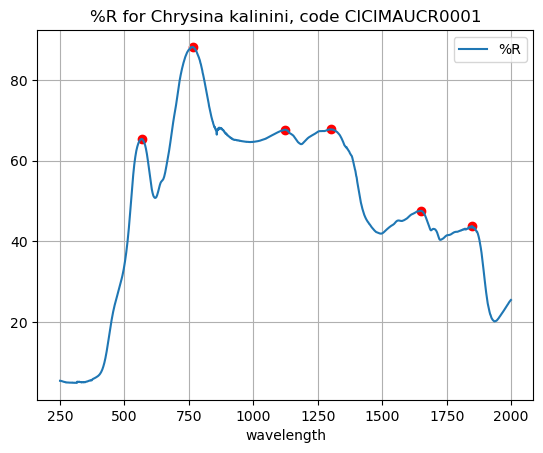

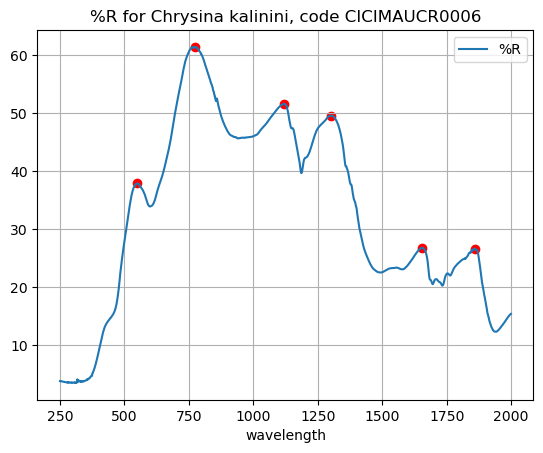

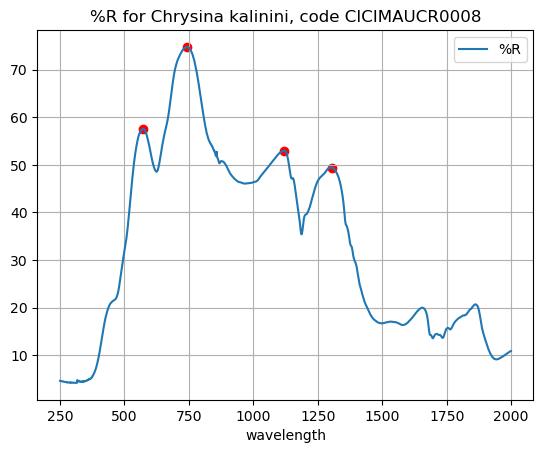

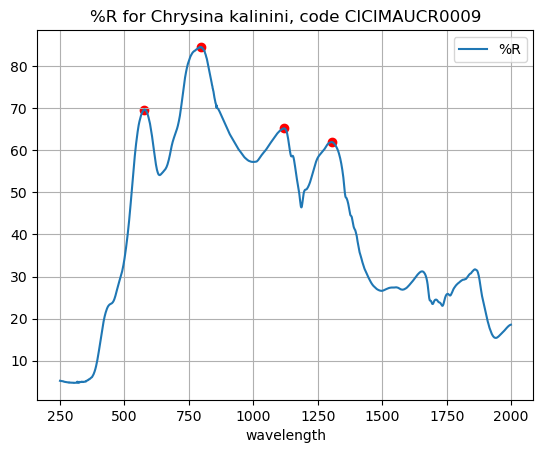

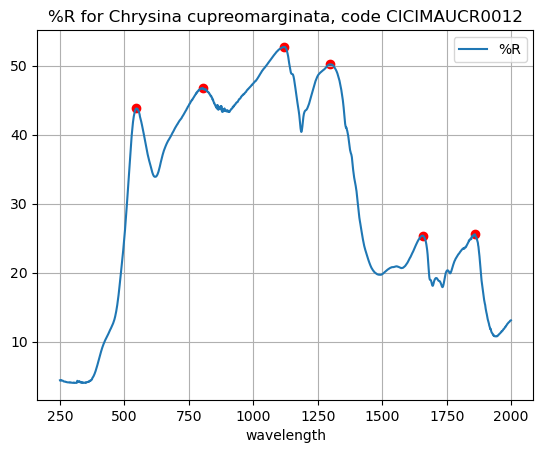

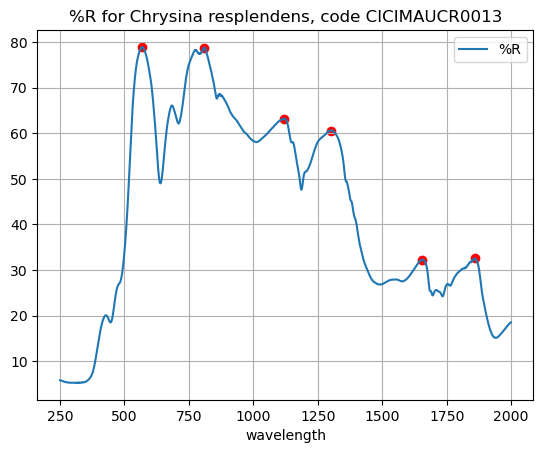

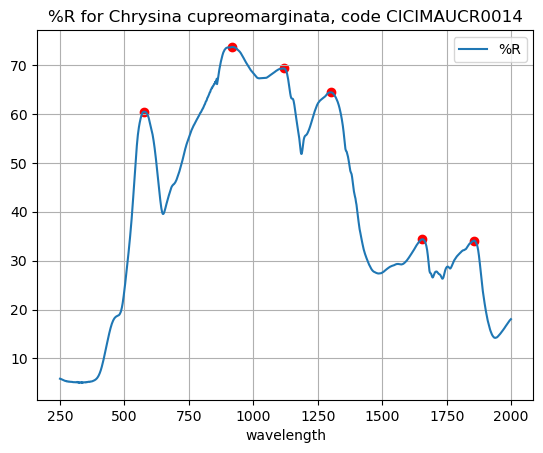

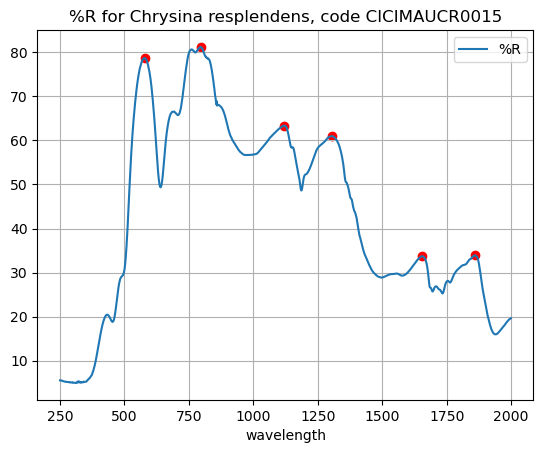

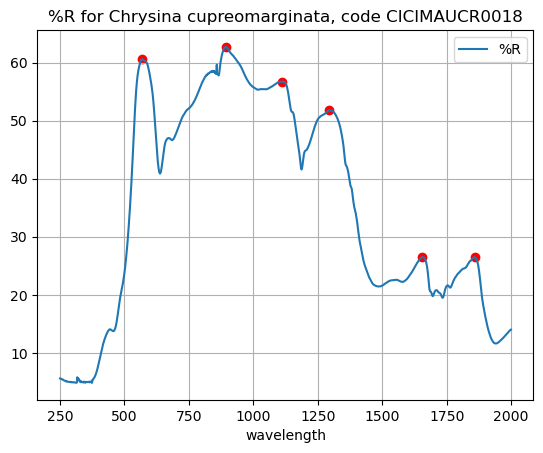

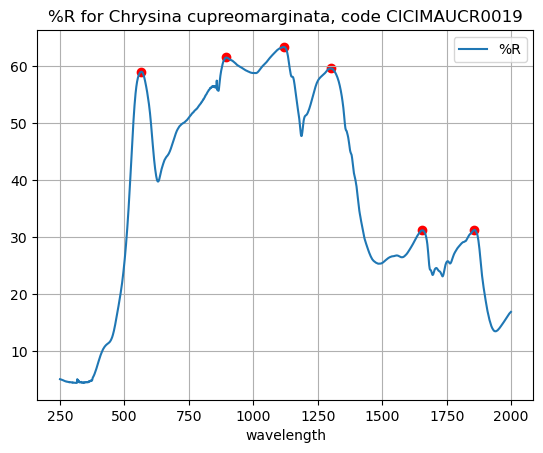

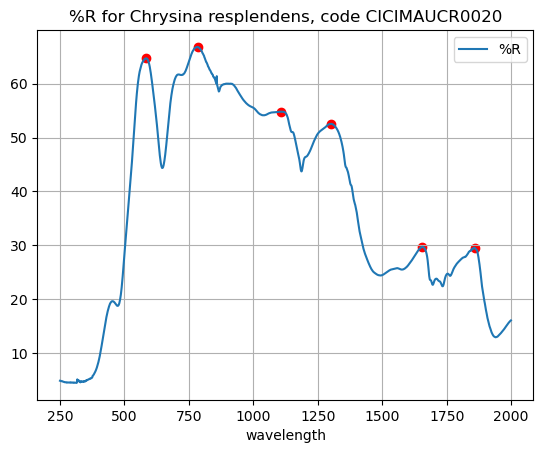

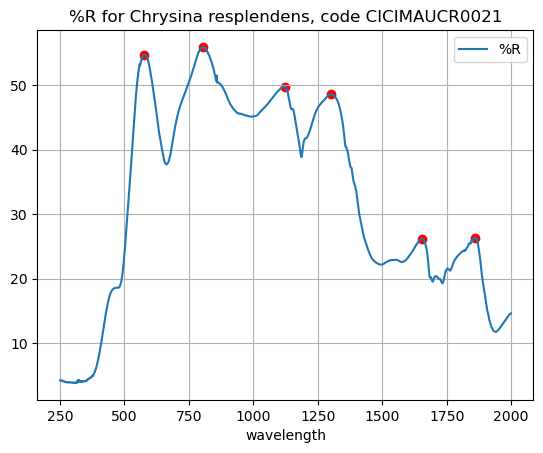

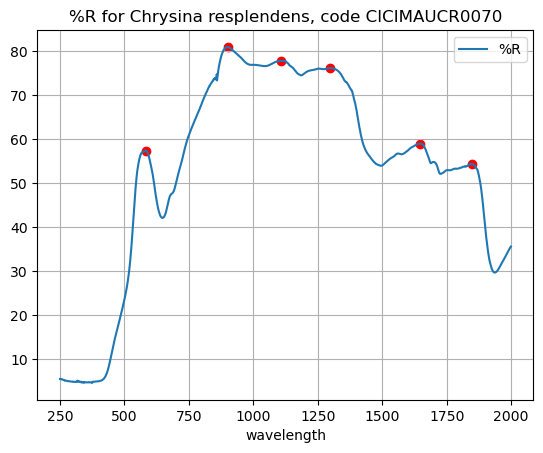

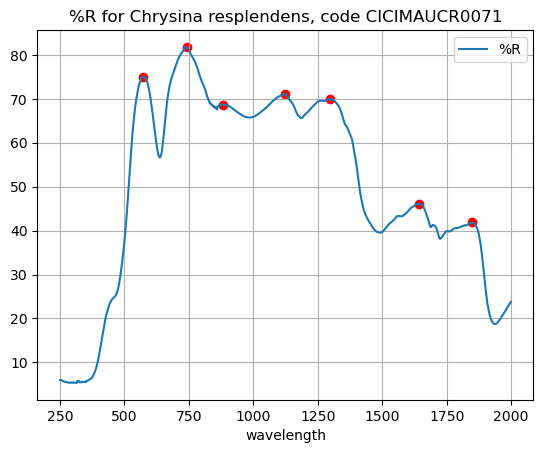

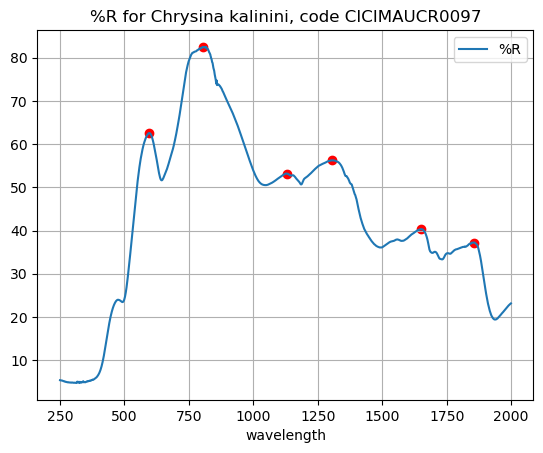

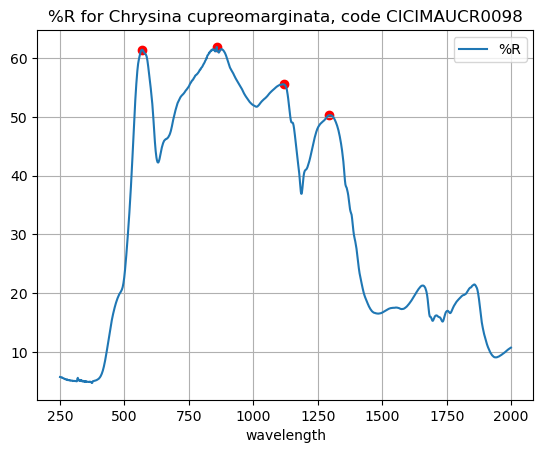

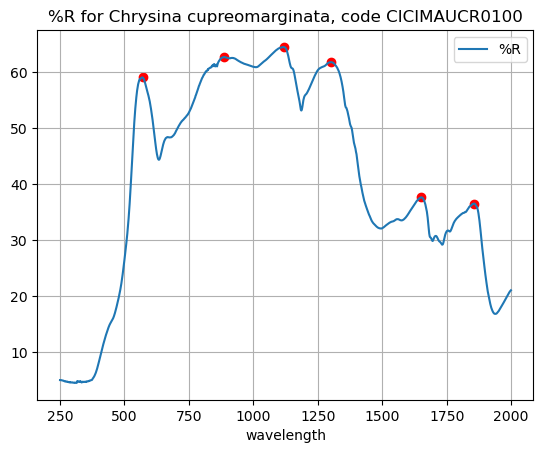

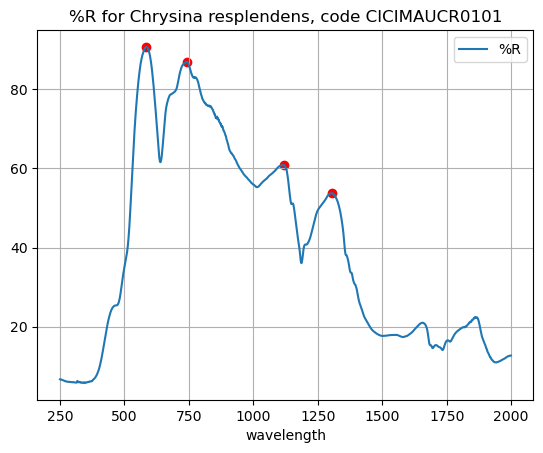

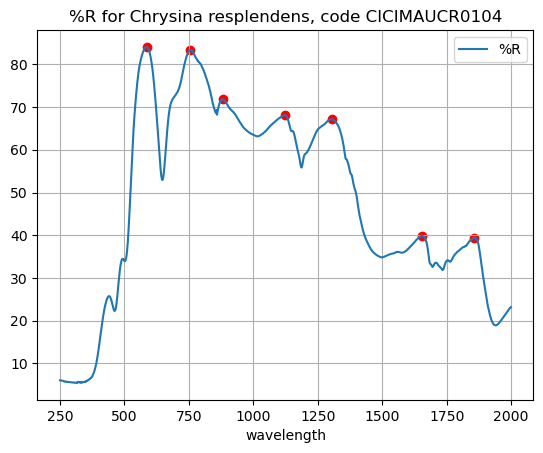

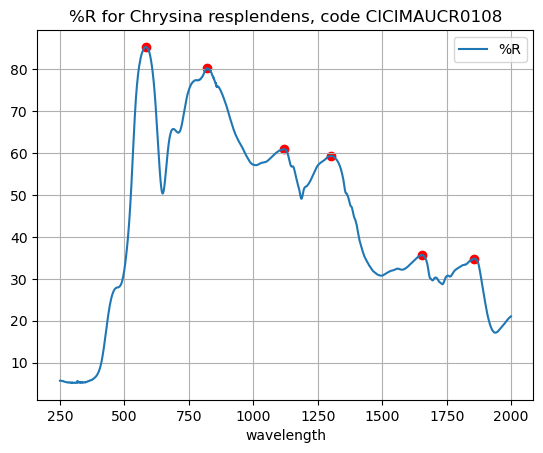

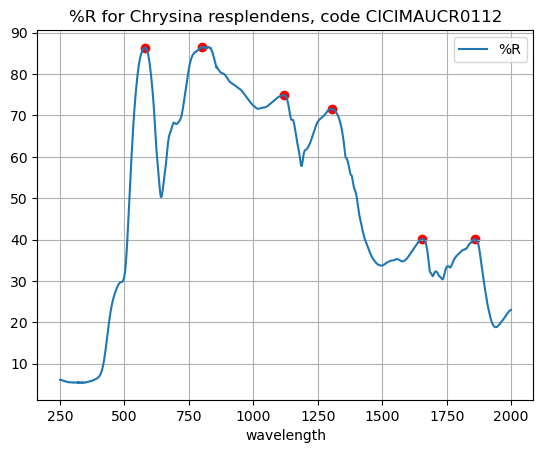

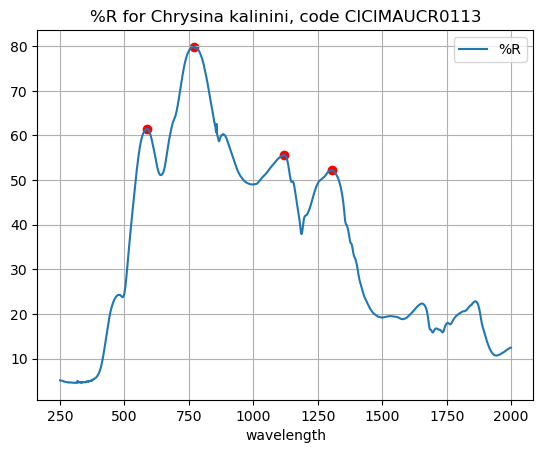

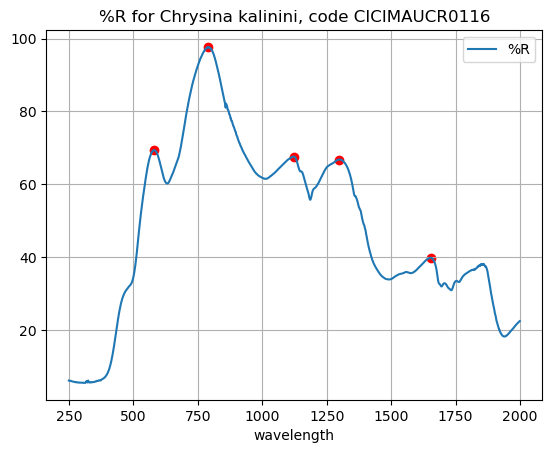

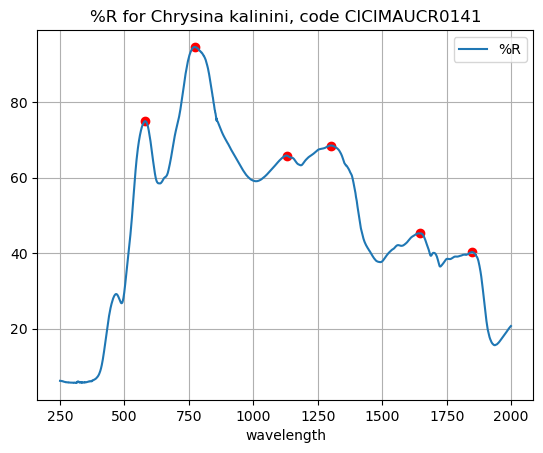

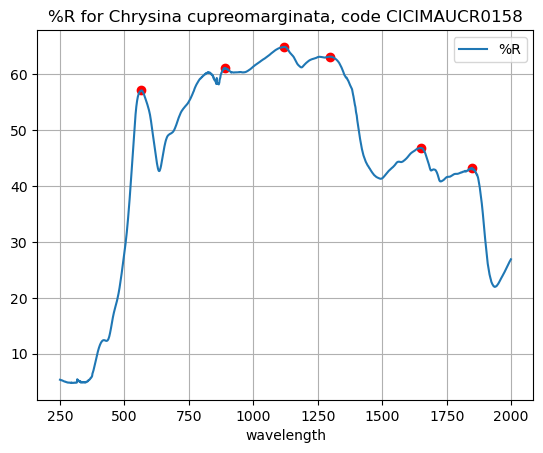

In [16]:
#First we filter the specimens to be analyzed
filtered_spectra, species_counter = get_filtered_spectra(collection_list)
#Then we create a section detailing the characteristics of each specimen.
specimen_section = get_specimen_section(filtered_spectra, species_counter)

### Gamma Class

### Algorithm 1: Simple gamma

In [17]:
class Gamma():
    """This is an abstract class that represents every gamma metric, allows it to be compared, have a description and a name.
    This is useful when using it in the report methods """
    
    def get_gamma_factor(self, spectrum):
        gamma_factor = None
        return gamma_factor

    def __init__(self, spectrum):
        self.spectrum = spectrum
        self.gamma = self.get_gamma_factor(spectrum)

    @staticmethod
    def name():
        return "Gamma class"

    @staticmethod
    def description():
        return "No description yet"

    def __lt__(self, other):
        return self.gamma < other.gamma

    def __repr__(self):
        return f'Gamma({self.gamma}) for {self.spectrum.genus} {self.spectrum.species} in {self.spectrum.filename}'


#### Gamma with arbitrary limits

In [18]:
class Gamma_Arbitrary_Limits(Gamma):
    """This gamma metric calculates the ratio between the maximum in the IR range and the maximum in the visible range. Ranges are static."""
    uv_vis_min_wavelength, uv_vis_max_wavelength = 250.00, 1000.00
    ir_min_wavelength = uv_vis_max_wavelength
    ir_max_wavelength = 2500.00

    def get_gamma_factor(self, spectrum):
        def get_maximum_in_range(spectrum, min_wavelength, max_wavelength):
            measuring_mode = spectrum.metadata["measuring_mode"]
            df = spectrum.data
            max_value = df[(df["wavelength"] > min_wavelength) & (df["wavelength"]  < max_wavelength) ].max()
            #print(f"max value \n {max_value}")
            wavelength, measure = max_value["wavelength"], max_value[measuring_mode]
            return wavelength, measure

        uv_vis_wavelength, uv_vis_max = get_maximum_in_range(spectrum, Gamma_Arbitrary_Limits.uv_vis_min_wavelength, Gamma_Arbitrary_Limits.uv_vis_max_wavelength)
        ir_wavelength, ir_max = get_maximum_in_range(spectrum, Gamma_Arbitrary_Limits.ir_min_wavelength, Gamma_Arbitrary_Limits.ir_max_wavelength)
        gamma_factor = (uv_vis_max / ir_max)*1.00
        return gamma_factor
        
    def get_gamma_factor_improved(self, spectrum):
        #get list of maxima and minima
        max_i, max_x, max_y = get_maxima(spectrum)
        #Divide second peak over first peak
        gamma_factor = max_y[1]/max_y[0]
        
        return gamma_factor

    def __init__(self, spectrum):
        self.spectrum = spectrum
        self.gamma = self.get_gamma_factor(spectrum)

    @staticmethod
    def name():
        return "Gamma_Arbitrary_Limits"

    @staticmethod
    def description():
        return f"""This algorithm calculates the ratio between the highest reflectance peak in the visible range (Between {Gamma_Arbitrary_Limits.uv_vis_min_wavelength} nm and {Gamma_Arbitrary_Limits.uv_vis_max_wavelength} nm)
                and the maximum peak in the IR range up to {Gamma_Arbitrary_Limits.ir_max_wavelength} nm. Beyond {Gamma_Arbitrary_Limits.ir_max_wavelength} nm the internal structure's reflectance generates unwanted noise."""

    def __lt__(self, other):
        return self.gamma < other.gamma

    def __repr__(self):
        return f'Gamma({self.gamma}) for {self.spectrum.genus} {self.spectrum.species} in {self.spectrum.filename}'


In [19]:
class Gamma_First_Two_Peaks(Gamma):
    """This gamma metric calculates the ratio between the maximum in the IR range and the maximum in the visible range. Ranges are static."""
    @staticmethod
    def get_gamma_factor_improved( spectrum):
        #get list of maxima and minima
        max_i, max_x, max_y = get_maxima(spectrum)
        #Divide second peak over first peak
        gamma_factor = max_y[1]/max_y[0]

        
        return gamma_factor

    def __init__(self, spectrum):
        self.spectrum = spectrum
        self.gamma = Gamma_First_Two_Peaks.get_gamma_factor_improved(spectrum)

    @staticmethod
    def name():
        return "Gamma_First_Two_Peaks"

    @staticmethod
    def description():
        return f"""This algorithm calculates the ratio between the second and first reflectance peak."""

    def __lt__(self, other):
        return self.gamma < other.gamma

    def __repr__(self):
        return f'Gamma({self.gamma}) for {self.spectrum.genus} {self.spectrum.species} in {self.spectrum.filename}'


### Gamma Testbench
This method is used to test each gamma factor implementation to determine how well it works to differentiate among  species.

In [20]:
class Gamma_Testbench():
    """This class tests the gamma metrics of the selected spectra and creates a boxplot for the species selected.
    Returns the path to the boxplot image"""
    #Calculate gammas
    
    def __init__(self, Gamma, filtered_spectra):
        self.gamma_class = Gamma
        self.spectra = filtered_spectra
        self.test_df, self.boxplot_path = self.get_boxplot()
        
    def get_boxplot(self):
        
        filtered_spectra = self.spectra
        Gamma = self.gamma_class
        
        gamma_list = []

        for spectrum in filtered_spectra:
            #print(spectrum.get_normalized_spectrum())
            try:
                gamma = Gamma(spectrum)
                gamma_list.append(gamma)
            except Exception as e:
                print(e)
        sorted(gamma_list)

        gamma_df = pd.DataFrame(columns=["species", "genus", "gamma", "code", "filename"])

        #add specimen information to the gammas
        for index, gamma in enumerate(gamma_list):
            gamma_df.loc[index,"species"] = gamma.spectrum.species
            gamma_df.loc[index,"genus"] = gamma.spectrum.genus
            gamma_df.loc[index,"gamma"] = gamma.gamma
            gamma_df.loc[index,"code"] = gamma.spectrum.code
            gamma_df.loc[index,"filename"] = gamma.spectrum.name

        #print(gamma_df)

        #finally, information is presented as a boxplot and saved
        ax = gamma_df.boxplot(column=["gamma"], by=["species"], ax=None, fontsize=None, rot=90, grid=True, figsize=(4*3, 4*3), layout=None, return_type=None, backend=None, showfliers=False)
        fig = ax.figure
        plt.title(f" Algorithm: {Gamma.name() }. Collections: {collection_names}. \n Gamma values for C. resplendens, C. kalinini and C. cupreomarginata.")
        
        path= os.path.join(report_location, "report_images", "gamma_image")
        create_path_if_not_exists(path)
        filename = os.path.join(path, f"{Gamma.name()} "+ database_descriptor + f"-{current_date}" +".jpeg") 
        fig.savefig(filename)
        
        return gamma_df, filename

In [21]:
#Saving_averages is True only with trusty spectra
saving_averages = True
#This class gets the average and standard deviation per species for a particular Gamma class
def get_gamma_avg_and_std(Gamma,filtered_spectra):
    
    #Calculate gammas
    gamma_list = []

    for spectrum in filtered_spectra:
        #print(spectrum.get_normalized_spectrum())
        try:
            gamma = Gamma(spectrum)
            gamma_list.append(gamma)
        except Exception as e:
            print(e)
    #Order the list
    sorted(gamma_list)
    #Create a dataframe
    gamma_df = pd.DataFrame(columns=["species", "genus", "gamma", "code", "filename"])

    #add specimen information to the gammas
    for index, gamma in enumerate(gamma_list):
        gamma_df.loc[index,"species"] = gamma.spectrum.species
        gamma_df.loc[index,"genus"] = gamma.spectrum.genus
        gamma_df.loc[index,"gamma"] = gamma.gamma
        gamma_df.loc[index,"code"] = gamma.spectrum.code
        gamma_df.loc[index,"filename"] = gamma.spectrum.name

    #get info on df
    grouped_stats = gamma_df.groupby('species')['gamma'].agg(['mean', 'std'])
    grouped_stats = grouped_stats.T
    print(grouped_stats)

    #save info in a file 
    #save information
    path_location = agregated_data_location + "\\aggregated_data\\gamma"
    create_path_if_not_exists(path_location)
    path_and_filename = path_location+f'{Gamma.name()}.txt'
    grouped_stats.to_csv( path_and_filename, index=False, sep = "\t")
    #return path
    return path_and_filename

### TEST Gamma Algorithm

Directory 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\report_images\gamma_image' already exists.
species_list = ['kalinini', 'cupreomarginata', 'resplendens']
                  average       std        Q1        Q3
kalinini         1.365986  0.095321  1.300276  1.438378
cupreomarginata  1.010115  0.083892  0.958045  1.084392
resplendens      1.232782  0.132939  1.151983  1.273478
Current differentiable_species=['kalinini', 'cupreomarginata', 'resplendens']
q1_main=1.300275679931431 q3_main=1.4383782880920426 q1_other=0.9580452449042998 q3_other=1.0843918647356154
Test: ( (q1_other < q1_main) & (q3_other < q1_main)) | ( (q3_main < q1_other) & (q3_main < q3_other)) =True
q1_main=1.300275679931431 q3_main=1.4383782880920426 q1_other=1.1519825335040925 q3_other=1.27347758494003
Test: ( (q1_other < q1_main) & (q3_other < q1_main)) | ( (q3_main < q1_other) & (q3_main < q3_other)) =True
Current differentiable_species=['kalinini', 'cupreomarginata', 'resplendens']


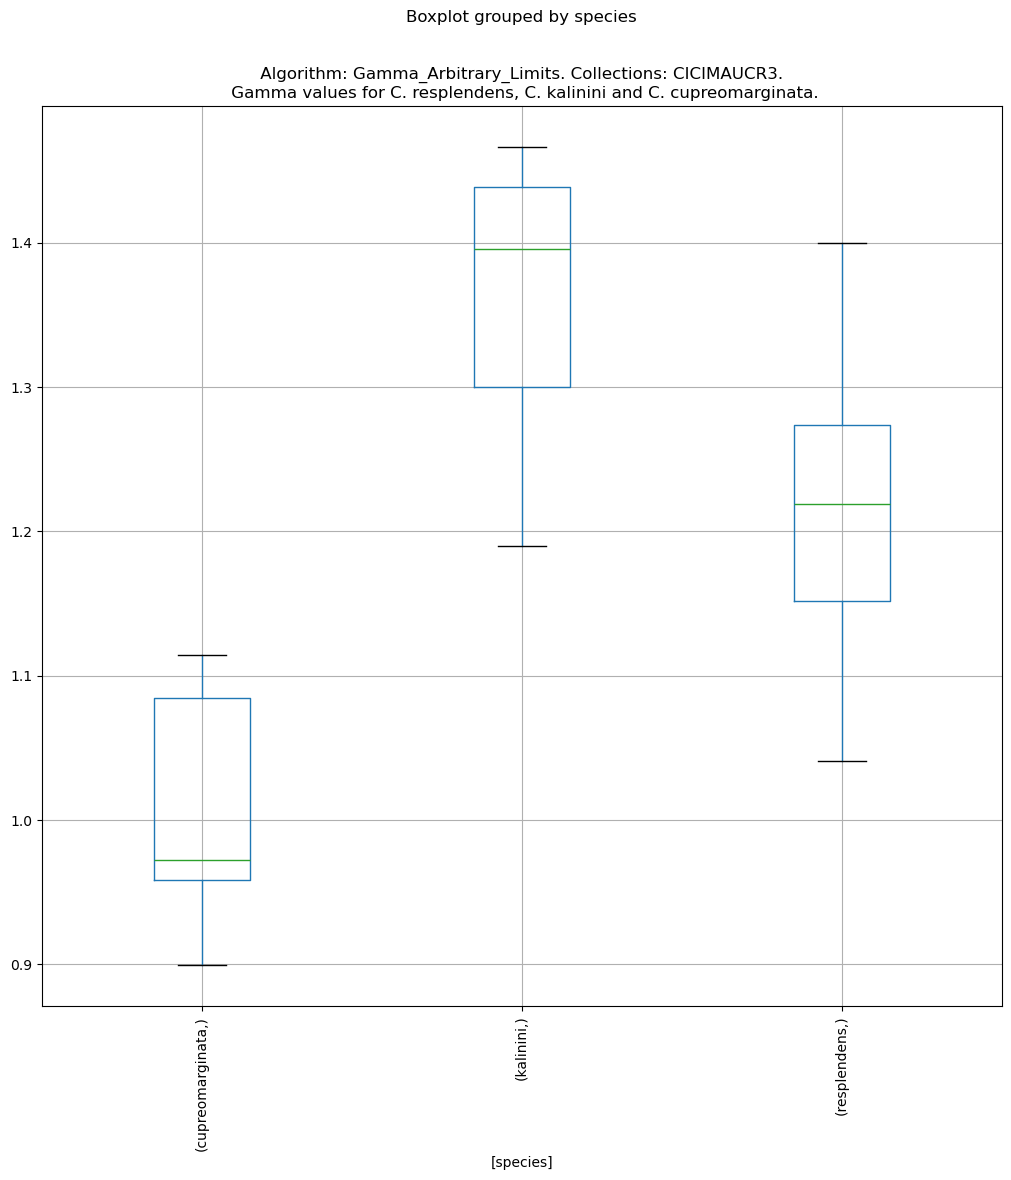

In [22]:
#Which method we are goint to test
gamma_testbench_arbitrary_limits = Gamma_Testbench(Gamma_Arbitrary_Limits, filtered_spectra)
#section related to that test
simple_gamma_section_arbitrary_limits = gamma_analysis( gamma_testbench_arbitrary_limits)



Directory 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\report_images\gamma_image' already exists.
species_list = ['kalinini', 'cupreomarginata', 'resplendens']
                  average       std        Q1        Q3
kalinini         1.346113  0.124812  1.289069  1.363633
cupreomarginata  1.054589  0.032028  1.038670  1.064294
resplendens      0.996066  0.177210  0.873982  1.029979
Current differentiable_species=['kalinini', 'cupreomarginata', 'resplendens']
q1_main=1.2890691476791931 q3_main=1.3636326999802642 q1_other=1.0386697931343356 q3_other=1.0642940614240273
Test: ( (q1_other < q1_main) & (q3_other < q1_main)) | ( (q3_main < q1_other) & (q3_main < q3_other)) =True
q1_main=1.2890691476791931 q3_main=1.3636326999802642 q1_other=0.8739822240980059 q3_other=1.029979456083224
Test: ( (q1_other < q1_main) & (q3_other < q1_main)) | ( (q3_main < q1_other) & (q3_main < q3_other)) =True
Current differentiable_species=['kalinini', 'cupreomarginata', 'resplendens

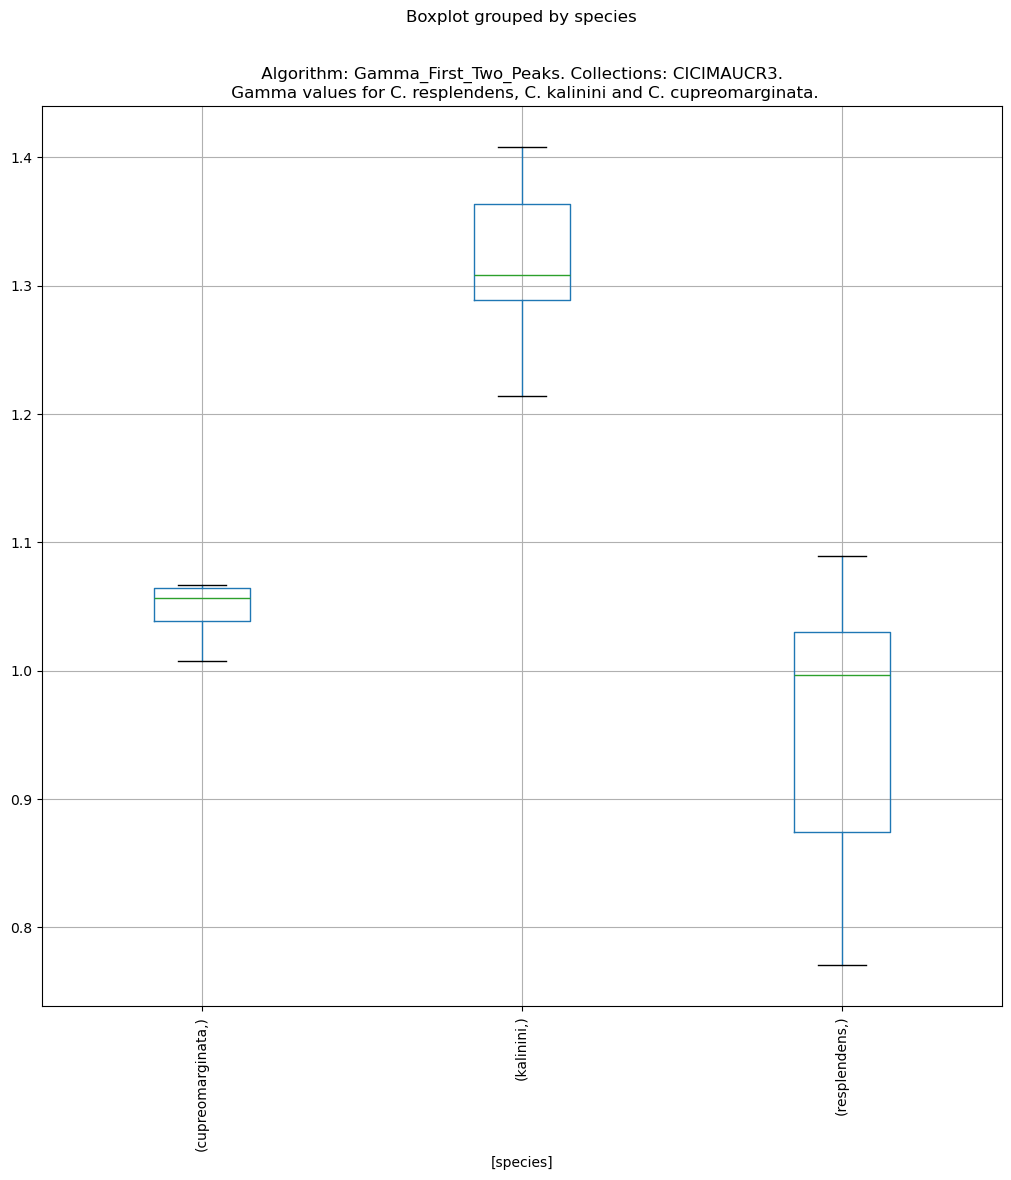

In [23]:
#Which method we are goint to test
gamma_test = Gamma_First_Two_Peaks
gamma_testbench_arbitrary_limits = Gamma_Testbench(gamma_test, filtered_spectra)
#section related to that test
simple_gamma_section_first_two_peaks = gamma_analysis( gamma_testbench_arbitrary_limits)
#create an aggregated data path
if training_data_is_used:
    aggregated_data_path =get_gamma_avg_and_std(gamma_test, filtered_spectra)


### Peaks average and standard deviation per species:
It calculates the average and standard deviation of each peak

In [24]:
test_spectra = filtered_spectra
def peak_average_std_per_species(spectra):
    peaklists = [PeakList(spectrum) for spectrum in spectra]
    #Create a dataframe with all peaks, y peaks are normalized respect to the height of the first peak
    specimen_peak_points = pd.DataFrame([])
    for index, peaklist in enumerate(peaklists):

        peaks = peaklist.get_peaks()

        peak_0_x = peaks[0].x_value
        peak_0_y = peaks[0].y_value

        spectrum = peaklist.spectrum
        code = spectrum.code
        genus = spectrum.genus
        species= spectrum.species
        specimen_peak_points.loc[index, "code"] = code
        specimen_peak_points.loc[index, "genus"] = genus
        specimen_peak_points.loc[index, "species"] = species
        for i in range(6):
            label_x = f"x{i}"
            label_y = f"y{i}"
            specimen_peak_points.loc[index, label_x] = 0.0
            specimen_peak_points.loc[index, label_y] = 0.0
            
        for i, peak in enumerate(peaks):
            label_x = f"x{i}"
            label_y = f"y{i}"
            specimen_peak_points.loc[index, label_x] = peak.x_value
            specimen_peak_points.loc[index, label_y] = peak.y_value/peak_0_y

    #specimen_peak_points
    #print(specimen_peak_points)
    #print(f"{peak_avg_std_df.loc[index:]}")
    #group values by species
    averages_df = specimen_peak_points.groupby('species')[['x0', 'y0','x1', 'y1', 'x2', 'y2','x3', 'y3','x4', 'y4', 'x5', 'y5']].mean().reset_index()
    standard_deviations_df = specimen_peak_points.groupby('species')[['x0', 'y0','x1', 'y1', 'x2', 'y2','x3', 'y3','x4', 'y4', 'x5', 'y5']].std().reset_index()

    #save information
    if training_data_is_used:
        path_location = report_location + "\\aggregated_data\\species_peaklist\\"
        create_path_if_not_exists(path_location)
        specimen_peak_points.to_csv( path_location+'peaks_krc.txt', index=False, sep = "\t")
        averages_df.to_csv(path_location+'peak_averages_krc.txt', index=False, sep = "\t")
        standard_deviations_df.to_csv(path_location+'peak_std_krc.txt', index=False, sep = "\t")

    #print(averages_df)
    #print(standard_deviations_df)

    return specimen_peak_points, averages_df, standard_deviations_df
specimen_peak_points, averages_df, standard_deviations_df = peak_average_std_per_species(filtered_spectra)

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_21224\2670604401.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'CICIMAUCR0001' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  specimen_peak_points.loc[index, "code"] = code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_21224\2670604401.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Chrysina' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  specimen_peak_points.loc[index, "genus"] = genus
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_21224\2670604401.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'kalinini' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  specimen_peak_points

In [25]:
#Create a function that calculates a similarity index given a spectrum
def similarity_index(spectrum, averages_df, standard_deviations_df , species):
    def distance(x, x0, sigma_0):
        index =  (((x - x0)**4)**(1/4))
        #print(f" x {x} - x0 {x0} = {(x - x0)} and index = {index}")
        return index
        #def get_gamma_factor(self, spectrum):
    #get first n peaks of the gamma
    n = 5
    peaklist = PeakList(spectrum)
    peaks = peaklist.get_peaks()[0:n]

    #loads species average values:

    averages_df = averages_df[averages_df["species"] == species]
    average_x_df = averages_df[["x0","x1","x2","x4","x5"]].values[0]

    standard_deviations_df = standard_deviations_df[standard_deviations_df["species"] == species]
    standard_deviation_x_df = standard_deviations_df[["x0","x1","x2","x4","x5"]].values[0]

    #print(f"averages_df: {averages_df}")
    #for each peak, calculate the distances to the averages x values
    similarity_index = 0.0

    for peak_i,xi_0, sigmai_0 in zip(peaks, average_x_df, standard_deviation_x_df):
        xi = peak_i.x_value
        similarity_index += distance(xi, xi_0, sigmai_0)

    #normalize for the number of points
    similarity_index = similarity_index/n
    #print(f"gamma: {gamma}")
    return similarity_index

specimen_peak_points, averages_df, standard_deviations_df = peak_average_std_per_species(filtered_spectra)

with open(agregated_data_avg_path, encoding= "latin1") as f:
    averages_df_0 = pd.read_csv(f, delimiter="\t", header=0)


with open(agregated_data_std_path, encoding= "latin1") as f:
    standard_deviations_df_0 = pd.read_csv(f, delimiter="\t", header=0)




def test_tool(correct_species, kali_si, cupr_si, resp_si):
    my_list =  [kali_si, cupr_si, resp_si]
    min_index = my_list.index(min(my_list))

    if (min_index == 0):
        return "kalinini"
    if (min_index == 1):
        return "cupreomarginata"
    if (min_index == 2):
        return "resplendens"

similarity_index_text_df = pd.DataFrame([])
for k, spectrum in enumerate(filtered_spectra):
    kali_si = similarity_index(spectrum, averages_df_0, standard_deviations_df_0 , "kalinini")
    cupr_si = similarity_index(spectrum, averages_df_0, standard_deviations_df_0 , "cupreomarginata")
    resp_si = similarity_index(spectrum, averages_df_0, standard_deviations_df_0 , "resplendens")
    similarity_index_text_df.loc[k,"code"] = spectrum.code
    similarity_index_text_df.loc[k,"species"] =spectrum.species
    similarity_index_text_df.loc[k,"kali_si"] = kali_si
    similarity_index_text_df.loc[k,"cupr_si"] = cupr_si
    similarity_index_text_df.loc[k,"resp_si"] = resp_si
    similarity_index_text_df.loc[k,"prediction"] = test_tool(spectrum.species, kali_si, cupr_si, resp_si)
    #print(f"similarity indices for {spectrum.species}: kali {kali_si}, cupreo {cupr_si}, resp_si {resp_si}")
    #print(f"Test tool: {test_tool(spectrum.species, kali_si, cupr_si, resp_si)}")
print(similarity_index_text_df)
count_by_test_result = similarity_index_text_df.groupby('prediction').size().reset_index(name='count')
print(f"count {count_by_test_result}")



             code          species     kali_si     cupr_si  resp_si  \
0   CICIMAUCR0001         kalinini   63.111429   93.023810   91.955   
1   CICIMAUCR0006         kalinini   67.511429   92.623810   91.555   
2   CICIMAUCR0008         kalinini   50.471429   90.323810   67.675   
3   CICIMAUCR0009         kalinini   61.371429   80.152381   56.075   
4   CICIMAUCR0012  cupreomarginata   76.511429   87.223810   86.155   
5   CICIMAUCR0013      resplendens   71.711429   81.223810   80.155   
6   CICIMAUCR0014  cupreomarginata   92.011429   82.509524   99.955   
7   CICIMAUCR0015      resplendens   67.211429   84.052381   81.155   
8   CICIMAUCR0018  cupreomarginata   88.711429   78.280952   97.155   
9   CICIMAUCR0019  cupreomarginata   89.111429   79.080952   97.955   
10  CICIMAUCR0020      resplendens   64.811429   85.252381   79.555   
11  CICIMAUCR0021      resplendens   69.211429   82.852381   80.355   
12  CICIMAUCR0070      resplendens   87.411429   81.109524   95.755   
13  CI

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_21224\2670604401.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'CICIMAUCR0001' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  specimen_peak_points.loc[index, "code"] = code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_21224\2670604401.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Chrysina' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  specimen_peak_points.loc[index, "genus"] = genus
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_21224\2670604401.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'kalinini' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  specimen_peak_points

In [26]:
def calculate_precision(df, species):
    print(f"{species =} \n {df=}" )
    """Precision: For a given prediction, what percentage is actually that species. """
    #filter all predictions of that particular species
    filtered_df = df[df["prediction"] == species]
    total_of_predictions = filtered_df["prediction"].count()
    print(f"{total_of_predictions=}" )
    #Now count the amount of actual species
    actual_species = filtered_df[filtered_df["species"] == species]["species"].count()
    precision = actual_species/total_of_predictions*100
    print(f"{precision=}" )
    return precision

In [27]:
def calculate_recall(df, species):
    print(f"{species =} \n {df=}" )
    """recall: For a given species, what percentage was correctly characterized. """
    #filter all lines of a particular species
    filtered_df = df[df["species"] == species]
    total_of_species = filtered_df["species"].count()
    print(f"{total_of_species=}" )
    #Count the amount of correct predictions
    correct_predictions = filtered_df[filtered_df["prediction"] == species]["prediction"].count()
    recall = correct_predictions/total_of_species*100
    print(f"{recall=}" )
    return recall

In [28]:
# Create sections with headings, paragraphs, and figures
def similarity_index_section(df ):

    #Define sections and results
    sections = {}
    results =[]
    information = []

    # Section 1: Introduction
    description = []
    title = [Paragraph(f"Similarity Index:", getSampleStyleSheet()["Heading2"]), Spacer(1, 12),

                    Paragraph("For each spectrum a similarity index is calculated which is the sum of the squared differences between the wavelength peak values of the unknown sample and the average wavelength peak values for each species.", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 12)]
    description += title

    

    #Add table with species info

    sub_title = [Paragraph(f"Test results:", getSampleStyleSheet()["Heading3"]), Spacer(1, 6),Paragraph("The reported(correct) species is compared with the species with the lowest similarity index (si), the final column (test_result) shows if the species coincide:", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 12)]

    information += sub_title
    
    #Amount of correct results

    correct_guesses  = (df['prediction'] == df["species"]).sum()
    total_guesses = df["prediction"].count()
    success_rate = correct_guesses / total_guesses * 100
    #accuracy, precision, recall, 
    comment_1 = [Paragraph(f"The amount of correct guesses is {correct_guesses} out of {total_guesses}", getSampleStyleSheet()["Heading3"]), 
                           Spacer(1, 6),
                           Paragraph(f"The accuracy (Percentage of correct classifications out of total classifications) is {success_rate:.2f} %", getSampleStyleSheet()["Normal"]),
                           Spacer(1, 12)]

    information += comment_1
    
  
    #precision and recall
    
    kali_precision = calculate_precision(df, "kalinini")
    kali_recall = calculate_recall(df, "kalinini")
    cupreo_precision = calculate_precision(df, "cupreomarginata")
    cupreo_recall= calculate_recall(df, "cupreomarginata")
    resp_precision= calculate_precision(df, "resplendens")
    resp_recall = calculate_recall(df, "resplendens")
    
    #commentary
    comment_2 = [Paragraph(f"For kalinini, precision (correct classifications out of all classifications for this species) is {kali_precision:.2f} % and recall (out of the actual specimens for this species how many were correctly classified) is {kali_recall:.2f} %.", 
                           getSampleStyleSheet()["Normal"]),
        Paragraph(f"For resplendens, precision is {resp_precision:.2f} % and recall is {resp_recall:.2f} %.", 
                           getSampleStyleSheet()["Normal"]),
        Paragraph(f"For cupreomarginata, precision is {cupreo_precision:.2f} % and recall is {cupreo_recall:.2f} %.", 
                           getSampleStyleSheet()["Normal"]),
                    Spacer(1, 12)]
    information += comment_2
    
    for column in df.columns:
        # Check if the column contains numeric values
        if pd.api.types.is_numeric_dtype(df[column]):
            # Round the values in the column to two decimal places
            df[column] = df[column].round(decimals=3)
            
    #create table with test result info
    names = df.columns.tolist()
    #names = ["a","a","a","a","a","a",]
    values_table =  df.values.tolist()

    info = [names, *values_table]
    print(info)
    #info =  df.values.tolist()
    #create table
    table2 = Table(info)
    style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.white),
                        ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
                        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
                        ('GRID', (0, 0), (-1, -1), 1, colors.black)])

    table2.setStyle(style)
    information.append(table2)
    information.append(PageBreak())


    return description  + information

In [29]:
similarity_index_section = similarity_index_section(similarity_index_text_df )

species ='kalinini' 
 df=             code          species     kali_si     cupr_si  resp_si  \
0   CICIMAUCR0001         kalinini   63.111429   93.023810   91.955   
1   CICIMAUCR0006         kalinini   67.511429   92.623810   91.555   
2   CICIMAUCR0008         kalinini   50.471429   90.323810   67.675   
3   CICIMAUCR0009         kalinini   61.371429   80.152381   56.075   
4   CICIMAUCR0012  cupreomarginata   76.511429   87.223810   86.155   
5   CICIMAUCR0013      resplendens   71.711429   81.223810   80.155   
6   CICIMAUCR0014  cupreomarginata   92.011429   82.509524   99.955   
7   CICIMAUCR0015      resplendens   67.211429   84.052381   81.155   
8   CICIMAUCR0018  cupreomarginata   88.711429   78.280952   97.155   
9   CICIMAUCR0019  cupreomarginata   89.111429   79.080952   97.955   
10  CICIMAUCR0020      resplendens   64.811429   85.252381   79.555   
11  CICIMAUCR0021      resplendens   69.211429   82.852381   80.355   
12  CICIMAUCR0070      resplendens   87.411429   81.

### Algorithm 3: Trapezoidal integration. Naive
This algorithm compares the area under the curve under the visible and IR region and compares them. Makes a cut at 800 nm

In [30]:
class GammaAreaUnderCurveNaive(Gamma):
    #this is a subclass of Gamma
    #get_gamma_factor must be redefined
    visible_start_wavelength = 450
    visible_end_wavelength = ir_start_wavelength = 800
    ir_end_wavelength = 1500

    def name():
        return "Gamma_area_under_curve_naive"

    def description():
        return f"This method calculates the ratio between the area under the curve for the spectrum between {GammaAreaUnderCurveNaive.visible_start_wavelength} and {GammaAreaUnderCurveNaive.visible_end_wavelength} nm (visible range) and between {GammaAreaUnderCurveNaive.ir_start_wavelength} nm and {GammaAreaUnderCurveNaive.ir_end_wavelength} nm (Infrarred range)."


    def get_gamma_factor(self, spectrum):

        def get_area_under_curve(spectrum, start_wavelength, finish_wavelength):
            # Subset the DataFrame to the range of interest
            subset_df = df[(df['wavelength'] >= start_wavelength) & (df['wavelength'] <= finish_wavelength)]

            # Extract the wavelengths and heights as arrays
            wavelengths = subset_df['wavelength'].values
            heights = subset_df[spectrum.measuring_mode].values

            # Calculate the area under the curve using the trapezoidal rule
            area_under_curve = np.trapz(heights, wavelengths)

            print("Area under the curve:", area_under_curve)
            return area_under_curve

        import numpy as np
        df = spectrum.get_normalized_spectrum()
        area_uv_visible = get_area_under_curve(spectrum, GammaAreaUnderCurveNaive.visible_start_wavelength, GammaAreaUnderCurveNaive.visible_end_wavelength)
        area_ir = get_area_under_curve(spectrum, GammaAreaUnderCurveNaive.ir_start_wavelength, GammaAreaUnderCurveNaive.ir_end_wavelength)
        gamma = area_uv_visible/area_ir
        return gamma


### Test Gamma Under Curve: Naive

Area under the curve: 241.18545497415468
Area under the curve: 503.96603861241994
Area under the curve: 235.2634253694537
Area under the curve: 503.59081540261604
Area under the curve: 255.38574487912496
Area under the curve: 403.93102433474087
Area under the curve: 246.88431903430842
Area under the curve: 463.655719297615
Area under the curve: 243.5871768937098
Area under the curve: 572.1637216324029
Area under the curve: 269.7276484642813
Area under the curve: 494.18815515688686
Area under the curve: 215.41489467871781
Area under the curve: 564.5018469280049
Area under the curve: 264.4882805853415
Area under the curve: 481.6530948470371
Area under the curve: 250.8596068236985
Area under the curve: 546.7602252109134
Area under the curve: 242.68173444009267
Area under the curve: 586.3119022487967
Area under the curve: 271.4151266079615
Area under the curve: 521.6509532531245
Area under the curve: 265.4081711204061
Area under the curve: 543.5214921962778
Area under the curve: 199.560441

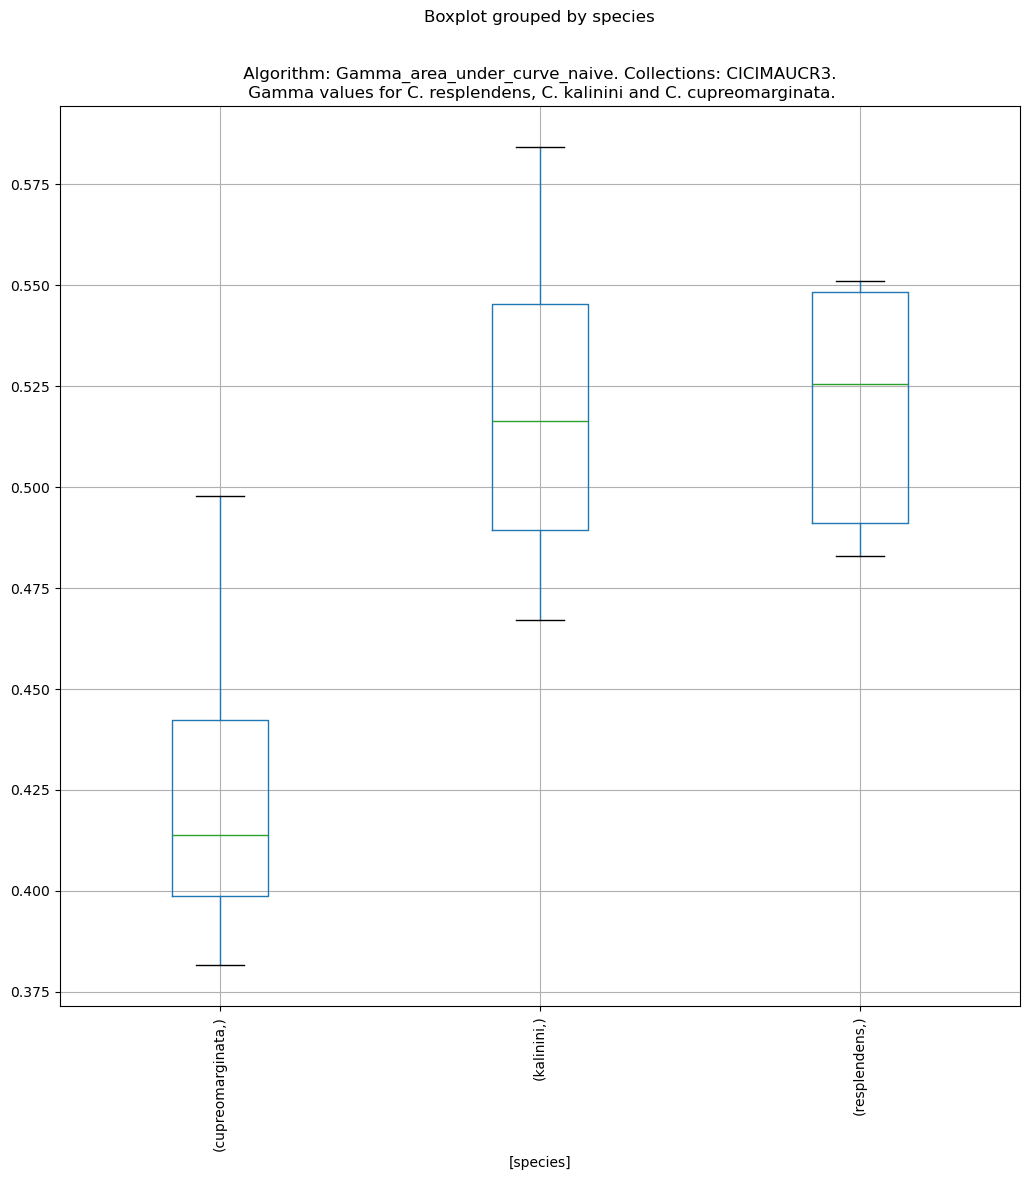

In [31]:
#Which method we are goint to test
gamma_test = GammaAreaUnderCurveNaive
gamma_testbench_arbitrary_limits = Gamma_Testbench(gamma_test, filtered_spectra)
#section related to that test
gamma_area_under_curve_naive_section = gamma_analysis( gamma_testbench_arbitrary_limits)

### Algorithm 4: Trapezoidal integration. Minimum detection
This algorithm compares the area under the curve under the visible and IR region and compares them. Makes a cut at the first minimum

In [32]:
def get_area_under_curve(spectrum, start_wavelength, finish_wavelength):
            # Assuming your DataFrame is named df and has columns 'wavelength' and 'height'
            # Let's say you have start_wavelength and finish_wavelength variables for the range you want to integrate over
            # Subset the DataFrame to the range of interest
            subset_df = df[(df['wavelength'] >= start_wavelength) & (df['wavelength'] <= finish_wavelength)]

            # Extract the wavelengths and heights as arrays
            wavelengths = subset_df['wavelength'].values
            heights = subset_df[spectrum.measuring_mode].values

            # Calculate the area under the curve using the trapezoidal rule
            area_under_curve = np.trapz(heights, wavelengths)

            print("Area under the curve:", area_under_curve)
            print("DEBUG method, delete in production")
            return area_under_curve

In [33]:
class  GammaAreaFirstMinCut(Gamma):
    #this is a subclass of Gamma
    #get_gamma_factor must be redefined
    visible_range_start_wavelength = 450
    def name():
        return "gamma_area_under_curve_cut_first_minimum"
    def description():
        return f"This algorithm calculates the area for the visible region (starting at {GammaAreaFirstMinCut.visible_range_start_wavelength} and ending in the first minima between the maximum in the visible range and the maximum in the IR range. Then calculates the area of the IR range up to the second minumum. The ratio between these two areas is the gamma value."

    def get_gamma_factor(self, spectrum):

        def get_area_under_curve(spectrum, start_wavelength, finish_wavelength):
            # Assuming your DataFrame is named df and has columns 'wavelength' and 'height'
            # Let's say you have start_wavelength and finish_wavelength variables for the range you want to integrate over
            # Subset the DataFrame to the range of interest
            subset_df = df[(df['wavelength'] >= start_wavelength) & (df['wavelength'] <= finish_wavelength)]

            # Extract the wavelengths and heights as arrays
            wavelengths = subset_df['wavelength'].values
            heights = subset_df[spectrum.measuring_mode].values

            # Calculate the area under the curve using the trapezoidal rule
            area_under_curve = np.trapz(heights, wavelengths)

            # print("Area under the curve:", area_under_curve)
            return area_under_curve

        import numpy as np

        #test_spectrum = filtered_spectra[0]
        #get the highest data recorded
        max_value = spectrum.data[spectrum.measuring_mode].max()
        #get maxima and minima
        x = spectrum.data["wavelength"].values
        y = spectrum.data[spectrum.measuring_mode].values

        #get x and y positions of maxima and minima
        max_i, max_xs, max_ys = get_maxima(spectrum)
        min_i, min_xs, min_ys= get_minima(spectrum)
        #


        #get x locations of first and second maxima and the minimum in between
        first_max_x = max_xs[0]
        try:
            second_max_x = max_xs[1]
        except Exception as e:
            second_max_x = x.max()
            print(e)
        try:
            second_max_y = max_ys[1]
        except Exception as e:
            second_max_y = 0
            print(e)

        min_in_between_i = 0
        min_in_between_x =0
        min_in_between_y =0
        #get the location of the minimum in between
        for index in min_i:
            #print("index")
            if first_max_x <= x[index] <= second_max_x:
                min_in_between_i = index
                min_in_between_x = x[index]
                min_in_between_y = y[index]
                break

        # print(f"min in bet: {min_in_between_i} {min_in_between_x} {min_in_between_y} ")
        #second minimum
        #get the location of the second minimum
        min_after_second_max_i = 0
        min_after_second_max_x = 0
        min_after_second_max_y = 0
        for index in min_i:
            # print(f" second_max_x  <= x[index] { second_max_x  <= x[index]}")
            if second_max_x  <= x[index]:
                min_after_second_max_i = index
                min_after_second_max_x = x[index]
                min_after_second_max_y = y[index]
                break


        # print(f"min after: {min_after_second_max_i} {min_after_second_max_x} {min_after_second_max_y} ")

        x_values = [first_max_x, min_in_between_x, second_max_x, min_after_second_max_x]
        y_values = [max_ys[0]/max_value, min_in_between_y/max_value, second_max_y/max_value, min_after_second_max_y/max_value]
        #get the normalized spectrum
        df = spectrum.get_normalized_spectrum()
        #plot
        x = df["wavelength"].values
        y =df[spectrum.measuring_mode].values

        #modify y to have last value equal to first one
        y_mod = y
        y_mod[-1] = y_mod[0]
        
        #split x, y LEFT
        print(f"fmi: {min_in_between_i}")
        x_left = x[:min_in_between_i]
        y_left = y[:min_in_between_i]
        #set last one to zero for picture to be displaye properly
        y_left[-1] = y_left[0]
        

        #split x, y RIGHT
        #print(f"min_after_second_max_i: {min_after_second_max_i}")
        x_right = x[min_in_between_i:min_after_second_max_i]
        y_right = y[min_in_between_i:min_after_second_max_i]
        #set last one to zero for picture to be displaye properly
        y_right[0] = y_right[-1] = y_left[0]
        
        #show figure


        area_uv_visible = get_area_under_curve(spectrum, GammaAreaFirstMinCut.visible_range_start_wavelength, min_in_between_x)
        area_ir = get_area_under_curve(spectrum, min_in_between_x, min_after_second_max_x)
        gamma = area_uv_visible/area_ir
        print(f"gamma: {gamma}")
        return gamma




fmi: 369
gamma: 0.4521044818641615
fmi: 349
gamma: 0.3417519290433961
fmi: 374
gamma: 0.48115916148887494
fmi: 387
gamma: 0.5879668546660911
fmi: 368
gamma: 0.43540951952520857
fmi: 389
gamma: 2.4419468947938303
fmi: 400
gamma: 0.3575701473321512
fmi: 390
gamma: 2.5091520713703166
fmi: 388
gamma: 0.36740929906911646
fmi: 380
gamma: 0.3491670406588191
fmi: 396
gamma: 0.6581387569513204
fmi: 413
gamma: 0.5187836563845009
fmi: 398
gamma: 0.2850282581684577
fmi: 387
gamma: 0.6236237979451069
fmi: 394
gamma: 0.5450839001853587
fmi: 381
gamma: 0.5794579095096887
fmi: 384
gamma: 0.35140534466803847
fmi: 389
gamma: 0.4205949947402189
fmi: 397
gamma: 0.716738585229638
fmi: 398
gamma: 3.1083365524100306
fmi: 392
gamma: 0.6851145213552826
fmi: 391
gamma: 0.5361559433857127
fmi: 381
gamma: 0.3129273282799099
fmi: 384
gamma: 0.5322524154374715
fmi: 384
gamma: 0.5930931053405663
Directory 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\report_images\gamma_image' already exis

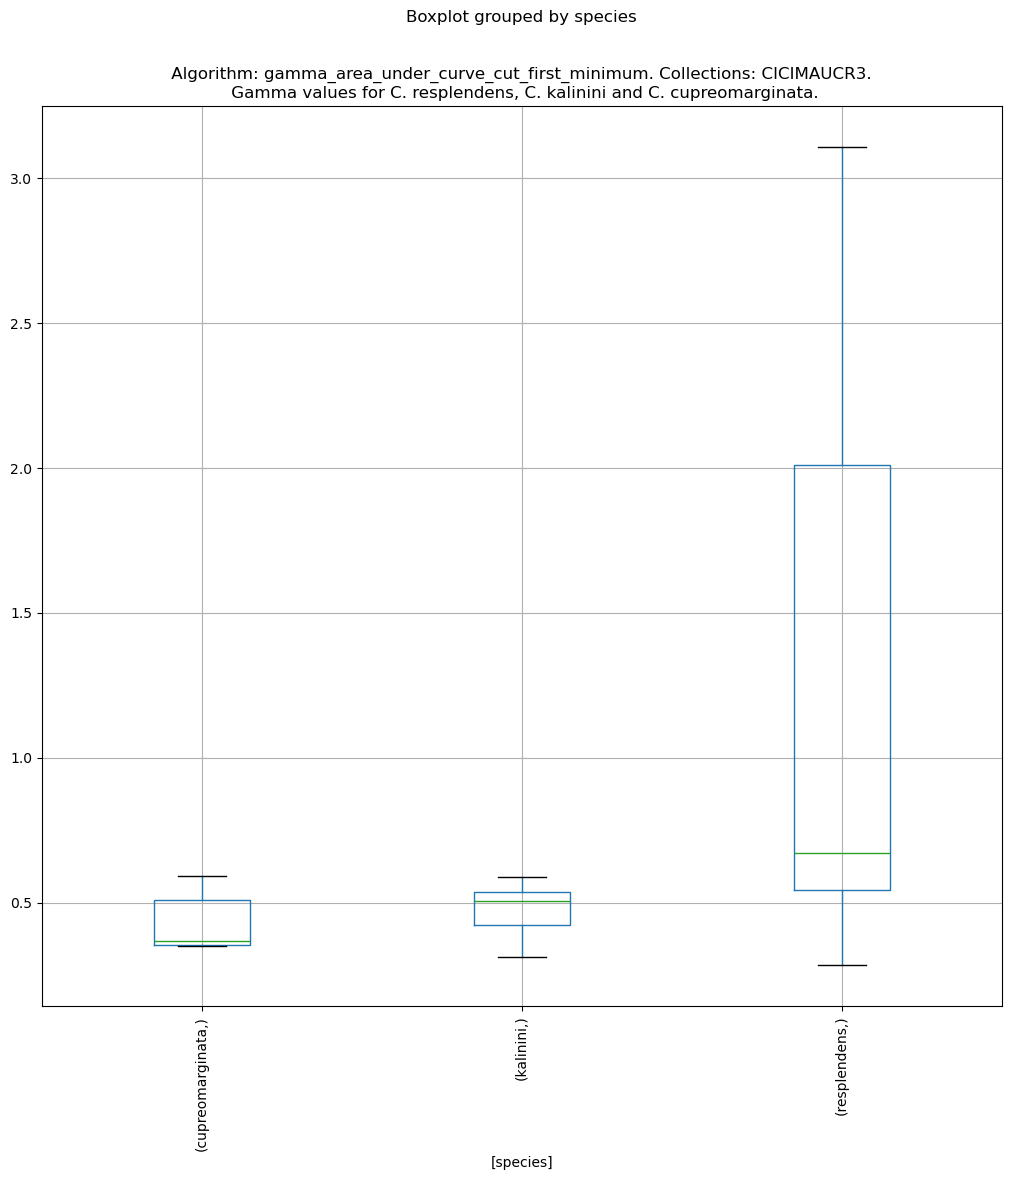

In [34]:

#Which method we are goint to test
gamma_test =GammaAreaFirstMinCut
gamma_testbench_arbitrary_limits = Gamma_Testbench(gamma_test, filtered_spectra)
#section related to that test
gamma_area_first_min_cut_section = gamma_analysis( gamma_testbench_arbitrary_limits)



### Algorithm 5: Peak ratio and wavelength index

In [35]:

class  Peak_Ratio_And_Wavelength_Similarity_Index():
    @staticmethod
    def name():
        return "Peak_Ratio_And_Wavelength_Similarity_Index"
    @staticmethod
    def description():
        return f""" This algorithm calculates the square difference for wavelength and the square difference in gamma values and multiplies them. 
Lower values are for spectra that has similar wavelengths and similar gamma values with respect to known spectra"""
    
    @staticmethod
    def gamma_similarity_index(gamma_two_peaks_aggregate_df, species, spectrum):
        def distance(x, x0, sigma_0):
            index =  (((x - x0)**2))/sigma_0
            return index
        gamma_first_two_peaks = Gamma_First_Two_Peaks(spectrum).gamma
         
        #loads species average and std values. Average is row 0 , std is row 1
    
        average_gamma_first_two_peaks = gamma_two_peaks_aggregate_df.loc[0, species]
        std_gamma_first_two_peaks = gamma_two_peaks_aggregate_df.loc[0, species]

        #calculates similarity index
        similarity_index = distance(gamma_first_two_peaks, average_gamma_first_two_peaks,std_gamma_first_two_peaks)
        
        return similarity_index

    def __init__( self, spectrum):
        self.spectrum = spectrum
        
    def get_indices_df(self):
        spectrum = self.spectrum
        gamma = 0
        #Reads the file with aggregated data for each species
        #aggregated_data_gamma_two_peaks = agregated_data_location + "\\aggregated_data\\gammaGamma_First_Two_Peaks.txt"
        aggregated_data_gamma_two_peaks = os.path.join(agregated_data_location, "aggregated_data","gammaGamma_First_Two_Peaks.txt")
        #read gamma averages per species
        gamma_two_peaks_aggregate_df = pd.read_csv(aggregated_data_gamma_two_peaks, delimiter="\t")
        
        
        #read peak averages and std
        peak_averages_df = pd.read_csv(agregated_data_avg_path, delimiter = "\t")
        peak_std_df = pd.read_csv(agregated_data_std_path, delimiter = "\t")

        #An empty dataframe with species info and gamma and wavelength square differences will be created

        indices_df = pd.DataFrame([])
        #species_list
        species_list = gamma_two_peaks_aggregate_df.columns
        for species in species_list:
            #gamma is calculated
            indices_df.loc[species,"gamma_similarity_index"] = gamma_similarity_index_value = Peak_Ratio_And_Wavelength_Similarity_Index.gamma_similarity_index(gamma_two_peaks_aggregate_df, species, spectrum)
            
            
            #square difference is calculated
            peak_similarity_index_value= similarity_index(spectrum, peak_averages_df, peak_std_df , species)
            indices_df.loc[species,"peak_similarity_index"] = peak_similarity_index_value

            
            #total
            indices_df.loc[species,"product"] = gamma_similarity_index_value*peak_similarity_index_value
            
        return indices_df
    


In [36]:
test_df = pd.DataFrame([])
for index, spectrum in enumerate(filtered_spectra):
    test_df.loc[index, "code"] = spectrum.code
    test_df.loc[index, "species"] = spectrum.species
    #get index df for each species
    index_df = Peak_Ratio_And_Wavelength_Similarity_Index(spectrum).get_indices_df()
    #print(index_df)
    test_df.loc[index, "cupreomarginata"] = index_df.loc["cupreomarginata", "product"]
    test_df.loc[index, "kalinini"] = index_df.loc["kalinini", "product"]
    test_df.loc[index, "resplendens"] = index_df.loc["resplendens", "product"]
    #get minimum value
    

test_df["prediction"]  = test_df[['cupreomarginata', 'kalinini', 'resplendens']].idxmin(axis=1)

print(test_df)
# gamma_test =Peak_Ratio_And_Wavelength_Index
# bp_path =gamma_testbench(gamma_test, filtered_spectra)
# print(f"type {type(bp_path)} bp_path")
# gamma_area_first_min_cut_section = gamma_analysis( gamma_test, bp_path  , "", "")

             code          species  cupreomarginata   kalinini  resplendens  \
0   CICIMAUCR0001         kalinini         7.632628   0.000325    11.482969   
1   CICIMAUCR0006         kalinini        28.135861   3.778160    35.849302   
2   CICIMAUCR0008         kalinini         5.097037   0.084862     6.216022   
3   CICIMAUCR0009         kalinini         1.931047   0.795916     2.673480   
4   CICIMAUCR0012  cupreomarginata         0.012315   4.434588     0.432662   
5   CICIMAUCR0013      resplendens         3.637895  13.794231     2.029524   
6   CICIMAUCR0014  cupreomarginata         0.252439   3.765867     1.334662   
7   CICIMAUCR0015      resplendens         3.475351  12.499528     1.840384   
8   CICIMAUCR0018  cupreomarginata         0.028842   6.383762     0.146927   
9   CICIMAUCR0019  cupreomarginata         0.011028   6.103805     0.211694   
10  CICIMAUCR0020      resplendens         0.039022   4.731841     0.106713   
11  CICIMAUCR0021      resplendens         0.083118 

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_21224\2689064587.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'CICIMAUCR0001' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_df.loc[index, "code"] = spectrum.code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_21224\2689064587.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'kalinini' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_df.loc[index, "species"] = spectrum.species


#### Peak_Ratio_And_Wavelength_Similarity_Index section

In [37]:
### SECTION
def Peak_Ratio_And_Wavelength_Similarity_Index_section(df ):
    
    #Define sections and results
    sections = {}
    results =[]
    information = []

    # Section 1: Introduction
    description = []
    title = [Paragraph(f"{Peak_Ratio_And_Wavelength_Similarity_Index.name()}:", getSampleStyleSheet()["Heading2"]), Spacer(1, 12),

                    Paragraph(f"{Peak_Ratio_And_Wavelength_Similarity_Index.description()}", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 12)]
    description += title


    
    
    #Add table with species info

    sub_title = [Paragraph(f"Test results:", getSampleStyleSheet()["Normal"]), Spacer(1, 6),Paragraph("The reported(correct) species is compared with the species with the lowest similarity index (si), the final column (test_result) shows if the species coincide:", getSampleStyleSheet()["Normal"]),
                    Spacer(1, 12)]
    
    information += sub_title
    
    #Amount of correct results

    correct_guesses  = (df['species'] == df['prediction']).sum()
    total_guesses = df["prediction"].count()
    success_rate = correct_guesses / total_guesses * 100
    
    comment_1 = [Paragraph(f"The amount of correct guesses is {correct_guesses} out of {total_guesses}", getSampleStyleSheet()["Heading3"]), 
                           Spacer(1, 6),
                           Paragraph(f"The accuracy (Percentage of correct classifications out of total classifications) is {success_rate:.2f} %", getSampleStyleSheet()["Normal"]),
                           Spacer(1, 12)]

    information += comment_1
    
    #precision and recall
    
    kali_precision = calculate_precision(df, "kalinini")
    kali_recall = calculate_recall(df, "kalinini")
    cupreo_precision = calculate_precision(df, "cupreomarginata")
    cupreo_recall= calculate_recall(df, "cupreomarginata")
    resp_precision= calculate_precision(df, "resplendens")
    resp_recall = calculate_recall(df, "resplendens") #
    
    #commentary
    comment_2 = [Paragraph(f"For kalinini, precision (correct classifications out of all classifications for this species) is {kali_precision:.2f} % and recall (out of the actual specimens for this species how many were correctly classified) is {kali_recall:.2f} %.", 
                           getSampleStyleSheet()["Normal"]),
        Paragraph(f"For resplendens, precision is {resp_precision:.2f} % and recall is {resp_recall:.2f} %.", 
                           getSampleStyleSheet()["Normal"]),
        Paragraph(f"For cupreomarginata, precision is {cupreo_precision:.2f} % and recall is {cupreo_recall:.2f} %.", 
                           getSampleStyleSheet()["Normal"]),
                    Spacer(1, 12)]
    information += comment_2
                  
    #create table with test result info
    
    #round column values
    for column in df.columns:
        # Check if the column contains numeric values
        if pd.api.types.is_numeric_dtype(df[column]):
            # Round the values in the column to two decimal places
            df[column] = df[column].round(decimals=3)
    #convert columns to list
    names = df.columns.tolist()
    
    values_table =  df.values.tolist()

    info = [names, *values_table]
    #print(info)
    #info =  df.values.tolist()
    #create table
    table2 = Table(info)
    style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.white),
                        ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
                        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
                        ('GRID', (0, 0), (-1, -1), 1, colors.black)])

    table2.setStyle(style)
    information.append(table2)
    information.append(PageBreak())


    return description  + information

In [38]:
peak_ratio_and_wavelength_similarity_index_section= Peak_Ratio_And_Wavelength_Similarity_Index_section(test_df )

species ='kalinini' 
 df=             code          species  cupreomarginata   kalinini  resplendens  \
0   CICIMAUCR0001         kalinini         7.632628   0.000325    11.482969   
1   CICIMAUCR0006         kalinini        28.135861   3.778160    35.849302   
2   CICIMAUCR0008         kalinini         5.097037   0.084862     6.216022   
3   CICIMAUCR0009         kalinini         1.931047   0.795916     2.673480   
4   CICIMAUCR0012  cupreomarginata         0.012315   4.434588     0.432662   
5   CICIMAUCR0013      resplendens         3.637895  13.794231     2.029524   
6   CICIMAUCR0014  cupreomarginata         0.252439   3.765867     1.334662   
7   CICIMAUCR0015      resplendens         3.475351  12.499528     1.840384   
8   CICIMAUCR0018  cupreomarginata         0.028842   6.383762     0.146927   
9   CICIMAUCR0019  cupreomarginata         0.011028   6.103805     0.211694   
10  CICIMAUCR0020      resplendens         0.039022   4.731841     0.106713   
11  CICIMAUCR0021      resp

### Create Report 

In [39]:
# Create PDF report
def create_report():
    elements = create_title_page()
    #sections, sections_start_pages = create_sections()
    elements += specimen_section
    elements += simple_gamma_section_arbitrary_limits 
    elements += simple_gamma_section_first_two_peaks
    elements += gamma_area_under_curve_naive_section
    elements += gamma_area_first_min_cut_section
    elements += similarity_index_section
    elements += peak_ratio_and_wavelength_similarity_index_section
    #elements += create_table_of_contents()

    ##elements += sections
    elements += create_bibliography()

    # # Update table of contents with page numbers
    # toc_style = getSampleStyleSheet()["Heading1"]
    # #toc_data = [[Paragraph(section, toc_style), str(page_num)] for section, page_num in sections_start_pages.items()]
    # toc_data = ["1"]
    # toc_table = Table(toc_data)
    # toc_table.setStyle(TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER')]))
    # elements[-1] = toc_table
    # elements += create_table_of_contents(toc_data)
    
    location = os.path.join(report_location, f"gamma analysis {collection_names} {current_date}.pdf" )
    doc = SimpleDocTemplate(location, pagesize=letter)
    doc.build(elements)
    print(f"The report was saved at {location} ")
create_report()

The report was saved at C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\data_analysis\gamma analysis CICIMAUCR3 2024-04-26.pdf 


###